In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Now, let's conduct explortory data analysis on the trainning dataset

In [138]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,1,67,0,3,0,37.205177,0,12.215677,7.780544,6.433890,...,1,0,6.009376,0,0,0,1,1,0,XXXConfid
1,2,65,1,0,0,35.141843,1,17.111404,6.645284,1.112379,...,0,0,7.519209,0,0,0,0,1,0,XXXConfid
2,3,62,0,1,1,17.875103,0,13.525546,9.585769,4.266008,...,0,0,8.573933,0,0,0,0,0,0,XXXConfid
3,4,67,0,0,1,37.503437,1,19.952014,1.953946,6.797333,...,0,0,6.217530,0,0,0,0,1,0,XXXConfid
4,5,65,1,0,2,29.187863,1,0.533209,8.759570,6.364302,...,1,0,5.193683,1,0,0,0,1,0,XXXConfid


In [175]:
df_train.shape

(1504, 33)

In [139]:
df_train.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
1499,1500,61,0,0,0,23.277977,0,10.078633,4.031667,8.823388,...,0,0,2.715334,0,0,1,0,0,1,XXXConfid
1500,1501,78,1,3,2,34.269800,0,18.380626,3.172166,2.417208,...,0,0,2.035936,1,0,0,0,0,0,XXXConfid
1501,1502,82,1,0,2,15.502097,0,14.553966,7.833535,0.961719,...,0,0,1.233285,0,0,1,0,0,0,XXXConfid
1502,1503,87,1,2,0,22.724597,0,14.910187,8.789306,1.289357,...,0,0,8.744376,0,0,0,0,0,0,XXXConfid
1503,1504,78,1,2,2,38.857452,0,14.411180,7.128370,2.176695,...,0,0,4.116633,0,0,0,1,0,0,XXXConfid


In [140]:
df_train.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [141]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  1504 non-null   int64  
 1   Age                        1504 non-null   int64  
 2   Gender                     1504 non-null   int64  
 3   Ethnicity                  1504 non-null   int64  
 4   EducationLevel             1504 non-null   int64  
 5   BMI                        1504 non-null   float64
 6   Smoking                    1504 non-null   int64  
 7   AlcoholConsumption         1504 non-null   float64
 8   PhysicalActivity           1504 non-null   float64
 9   DietQuality                1504 non-null   float64
 10  SleepQuality               1504 non-null   float64
 11  FamilyHistoryAlzheimers    1504 non-null   int64  
 12  CardiovascularDisease      1504 non-null   int64  
 13  Diabetes                   1504 non-null   int64

In [142]:
df_train.shape

(1504, 35)

In [143]:
df_train.drop(['PatientID', 'DoctorInCharge'], axis = 1, inplace = True)

In [144]:
numerical_columns = []
for col in df_train.columns:
    if df_train[col].nunique() > 4:
        numerical_columns.append(col)
print(f"Numerical columns:", numerical_columns)

Numerical columns: ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']


Variables explanations:
1. Age: The age of the patients ranges from 60 to 90 years.
2. BMI: Body Mass Index of the patients, ranging from 15 to 40.
3. AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
4. PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
5. DietQuality: Diet quality score, ranging from 0 to 10.
6. SleepQuality: Sleep quality score, ranging from 4 to 10.
7. SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
8. DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
9. CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
10. CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
11. CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
12. CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.
13. MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
14. FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
15. ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

In [145]:
print(len(numerical_columns))

15


In [146]:
df_train[numerical_columns].describe()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,74.905585,27.548815,10.030205,4.914426,4.937305,7.041647,134.706782,89.707447,225.173481,124.876496,59.514799,226.901473,14.649149,5.139887,4.903536
std,8.950094,7.193223,5.744749,2.896729,2.937512,1.752628,25.751560,17.669609,42.327432,43.455033,23.111793,102.130486,8.552472,2.902591,2.928168
min,60.000000,15.012071,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.400003,20.003434,50.407194,0.035301,0.000460,0.004354
25%,67.000000,21.367128,5.204286,2.538671,2.302514,5.479861,112.000000,74.000000,190.472496,87.522288,39.147453,136.307703,7.115501,2.658828,2.358590
50%,75.000000,27.764441,9.924320,4.790574,4.979274,7.100447,135.000000,90.000000,224.414360,124.522941,59.594257,229.554084,14.322488,5.191134,4.877862
75%,83.000000,33.777545,15.140505,7.452197,7.576618,8.550267,156.000000,105.000000,262.475669,161.961236,78.906218,313.062945,21.838566,7.616355,7.517219
max,90.000000,39.934175,19.988291,9.987429,9.998346,9.999840,179.000000,119.000000,299.959991,199.965665,99.980324,399.941862,29.991381,9.996467,9.972663


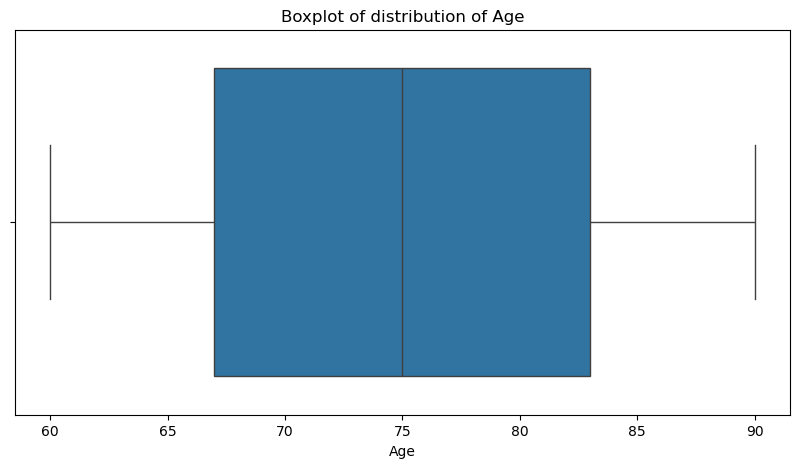

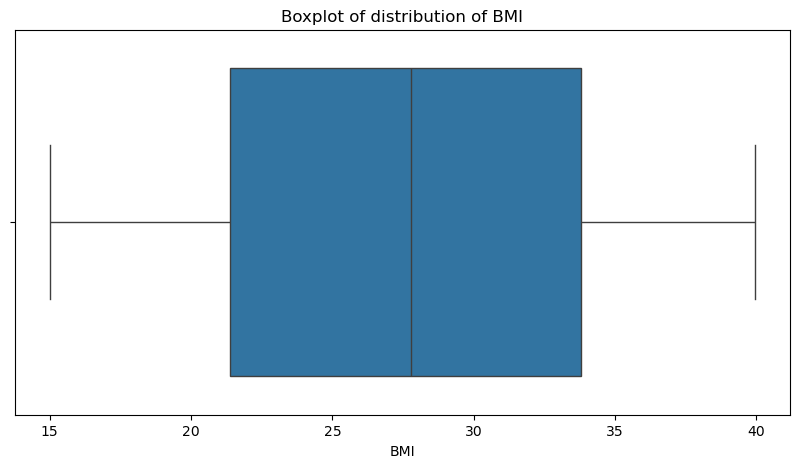

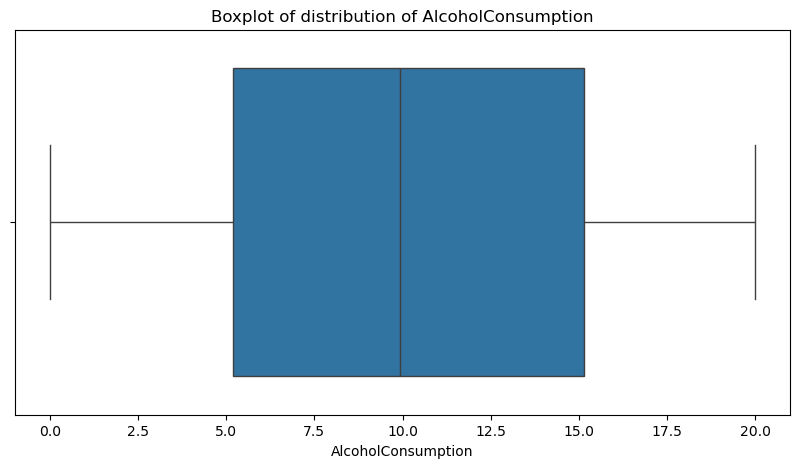

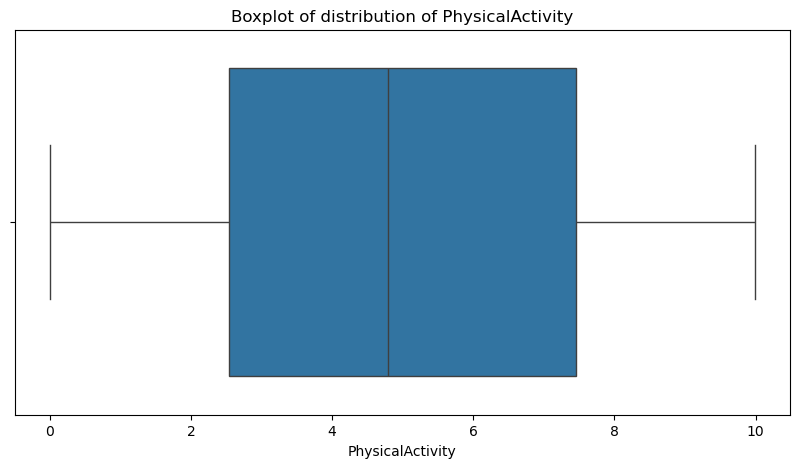

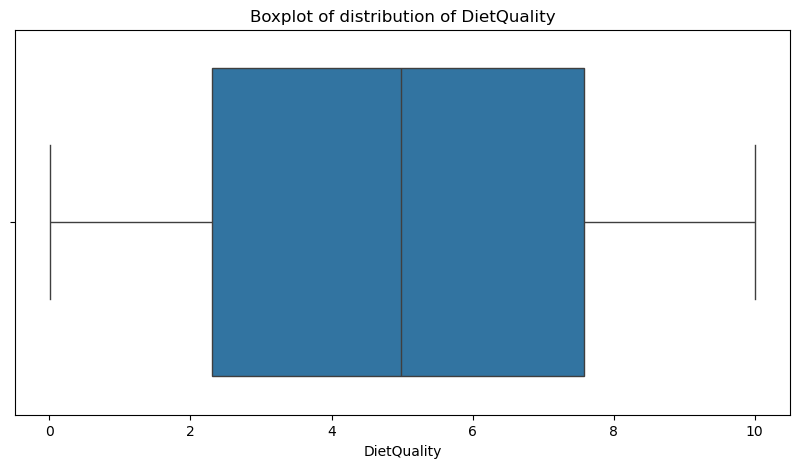

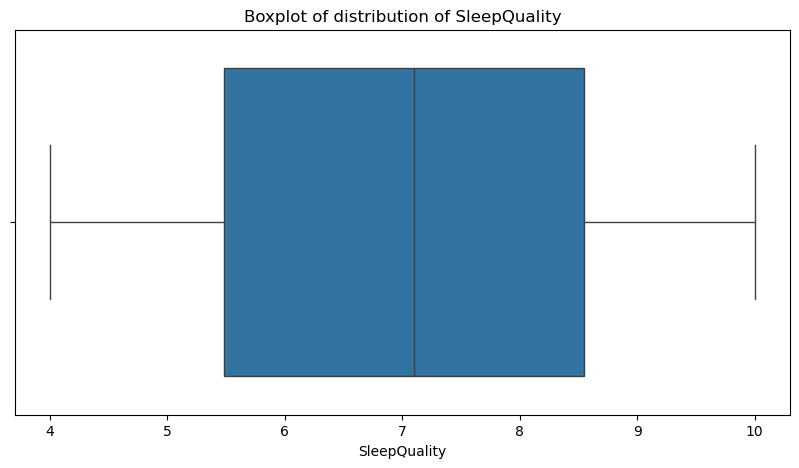

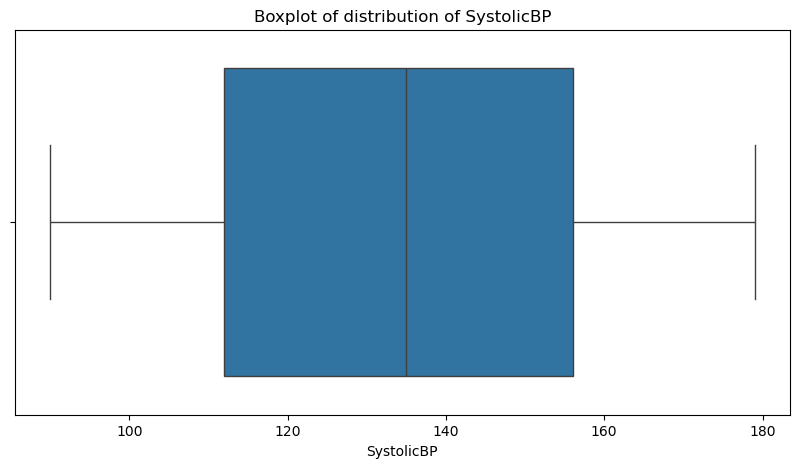

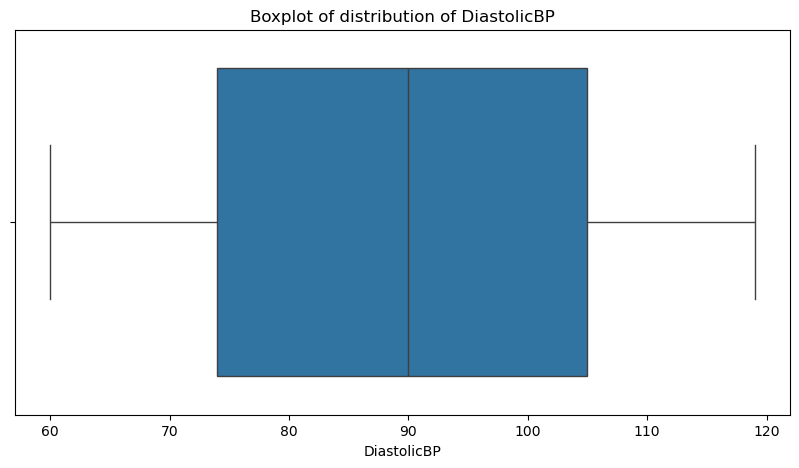

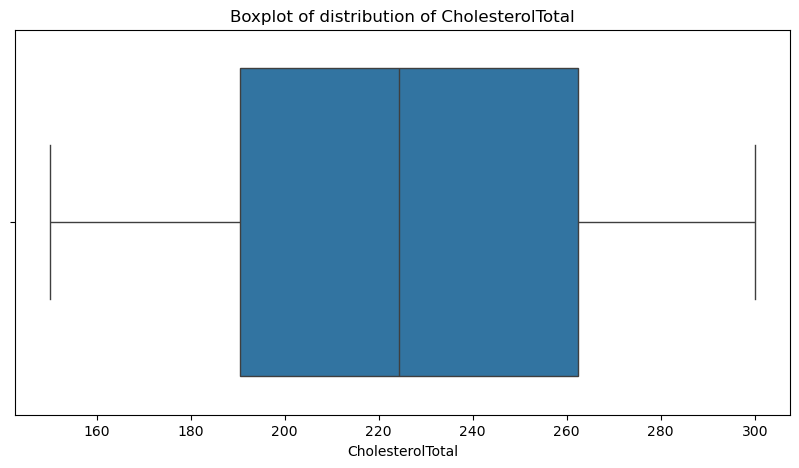

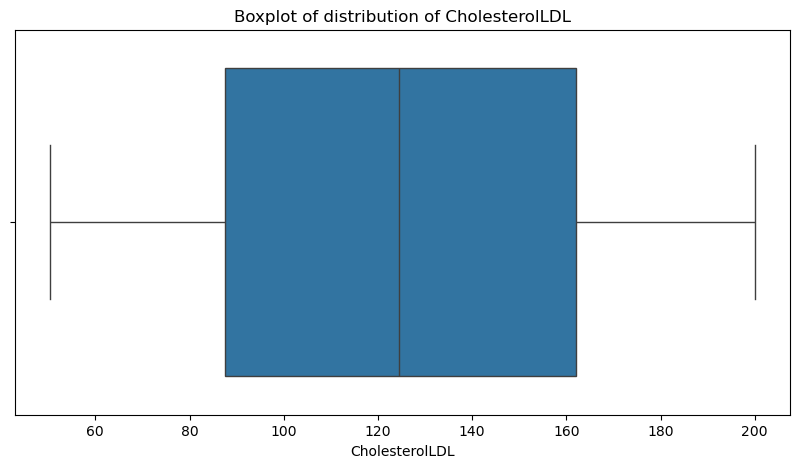

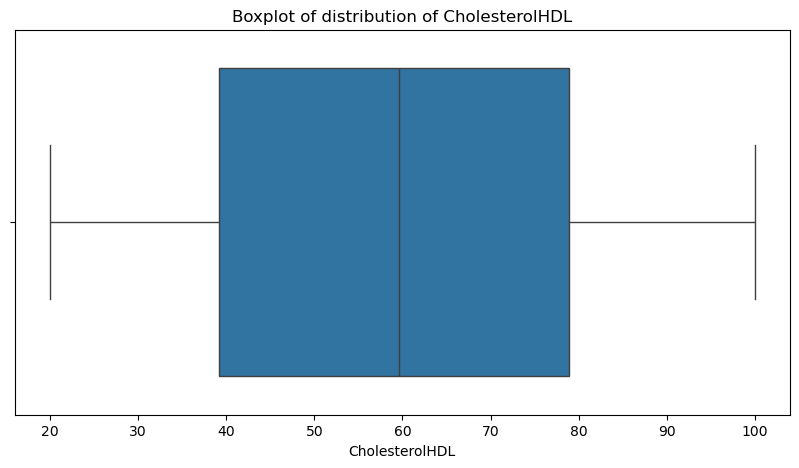

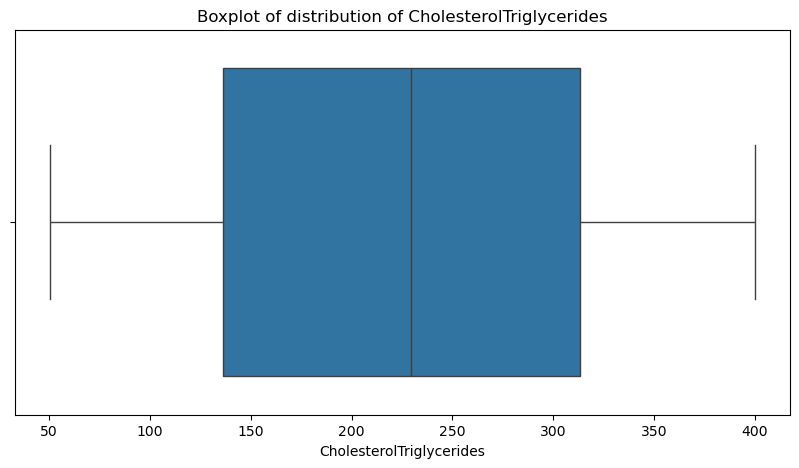

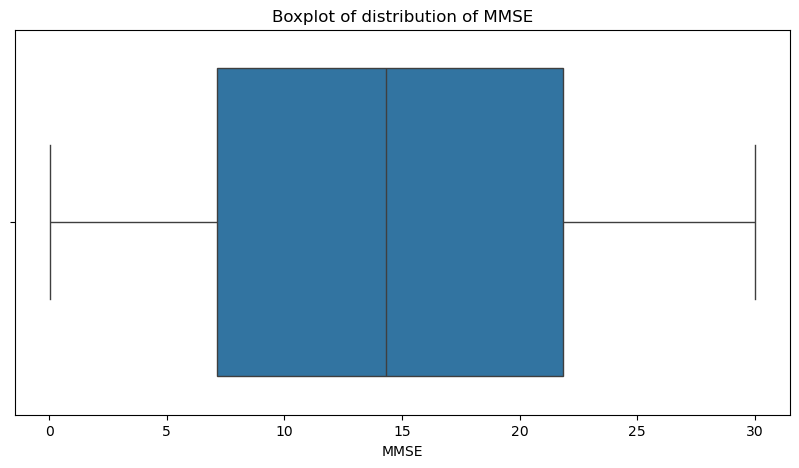

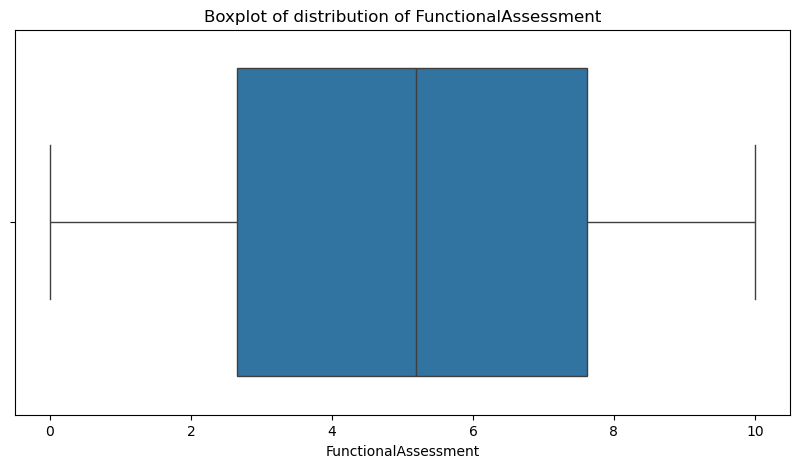

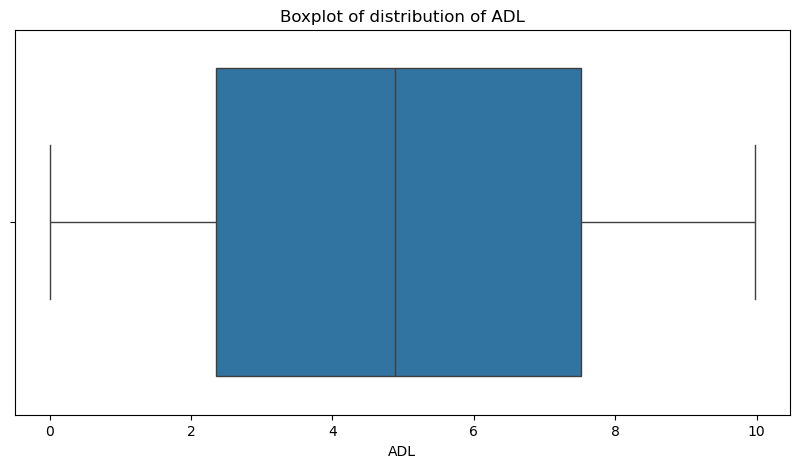

In [147]:
for col_1 in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_train, x=col_1)
    plt.title(f'Boxplot of distribution of {col_1}')
    plt.show()

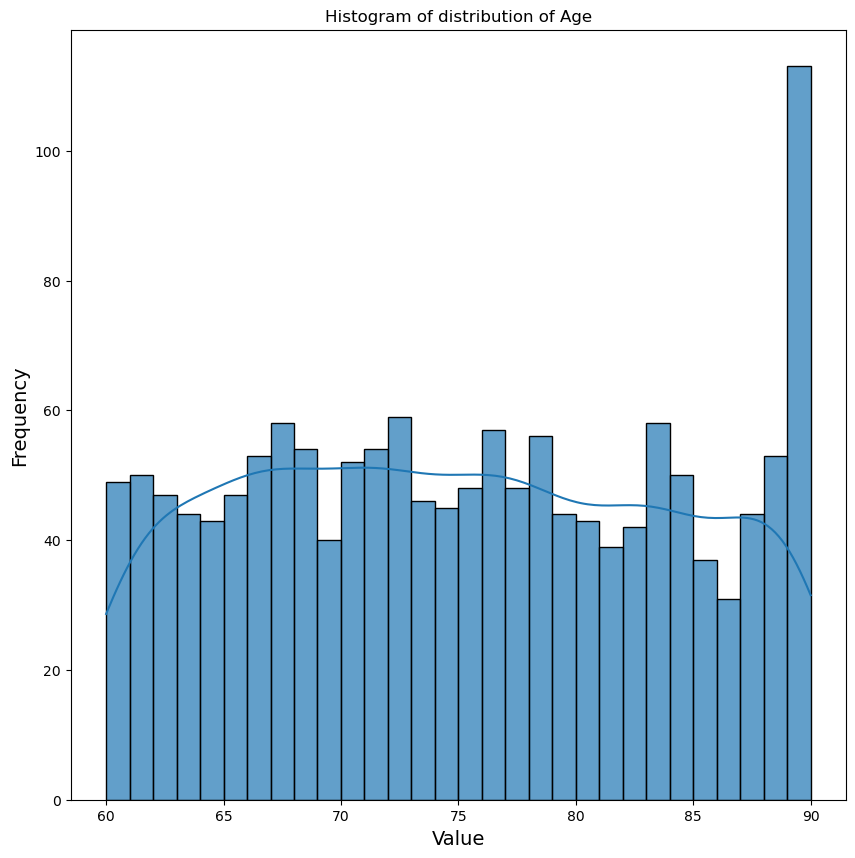

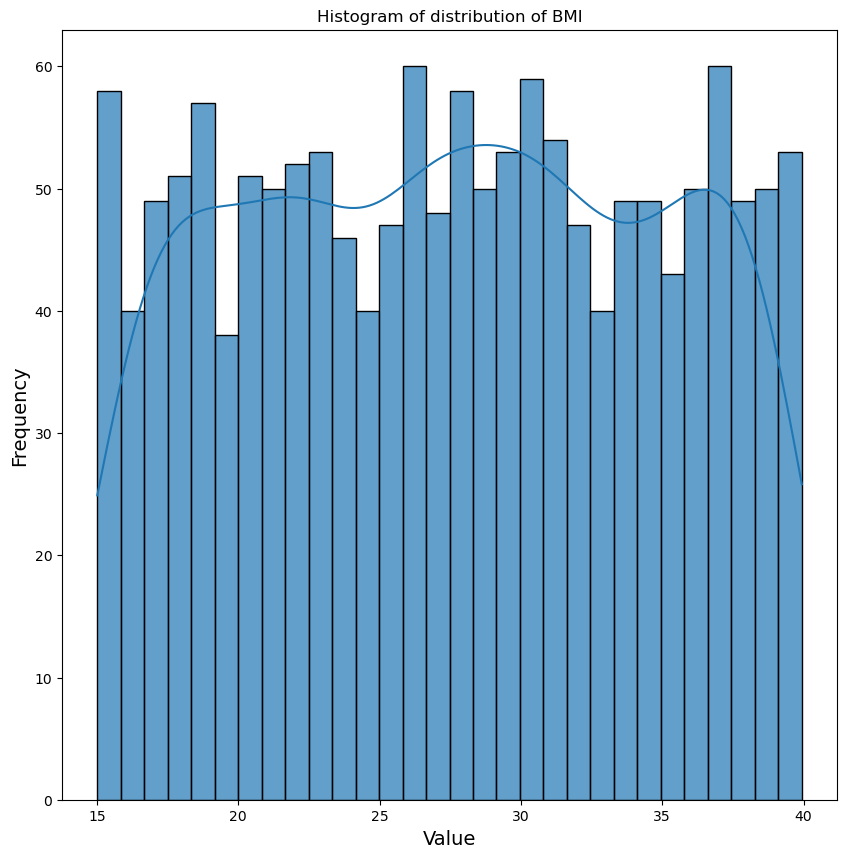

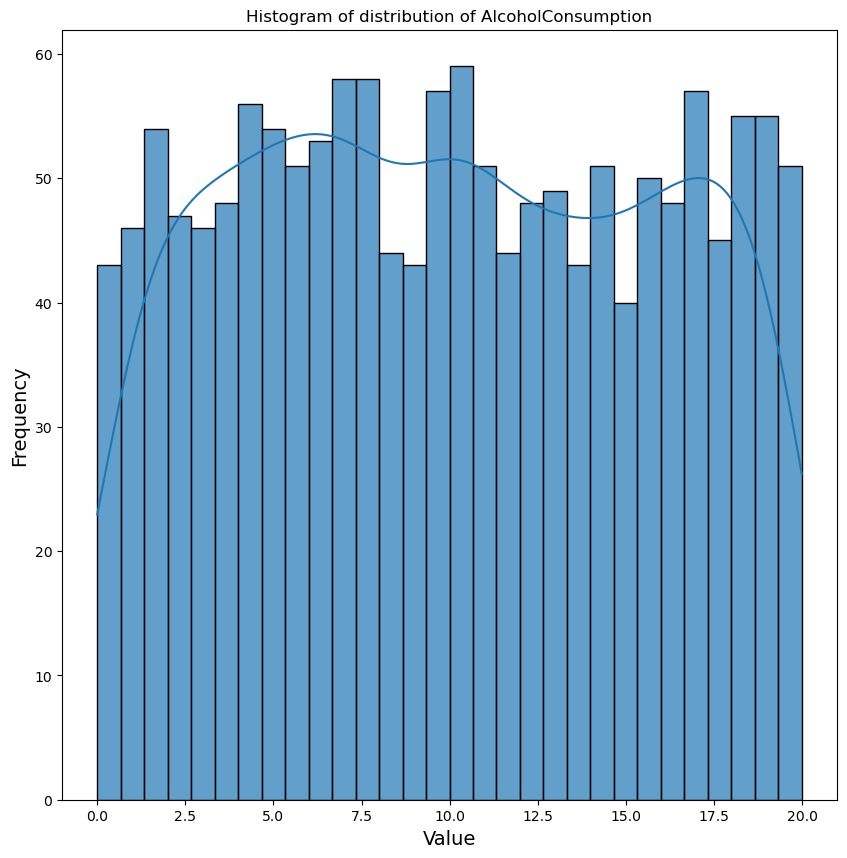

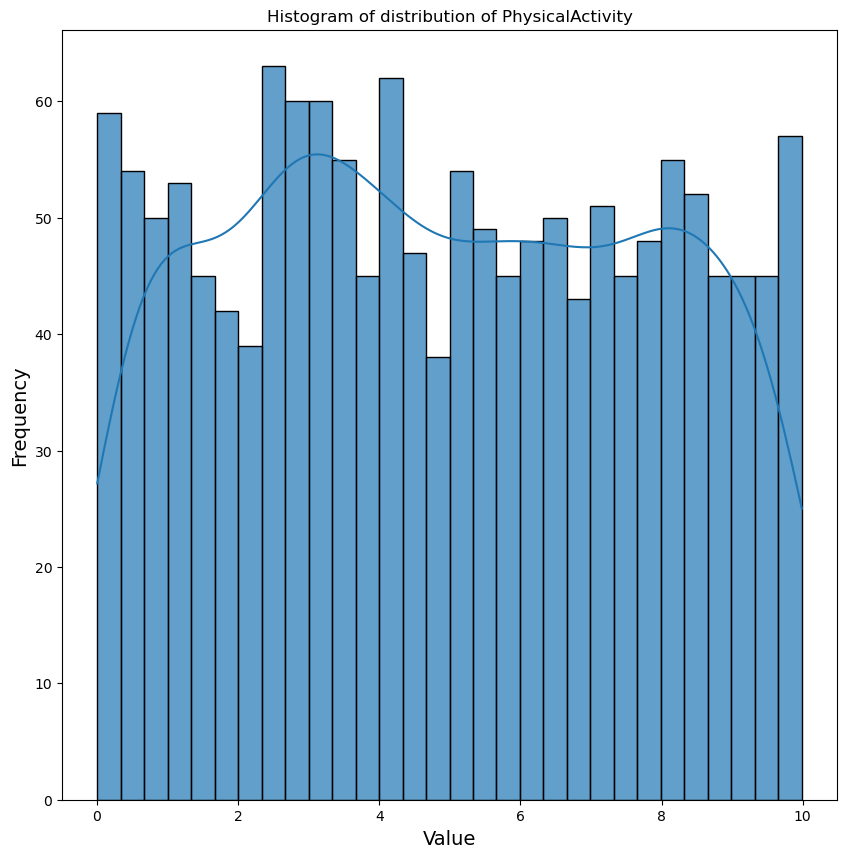

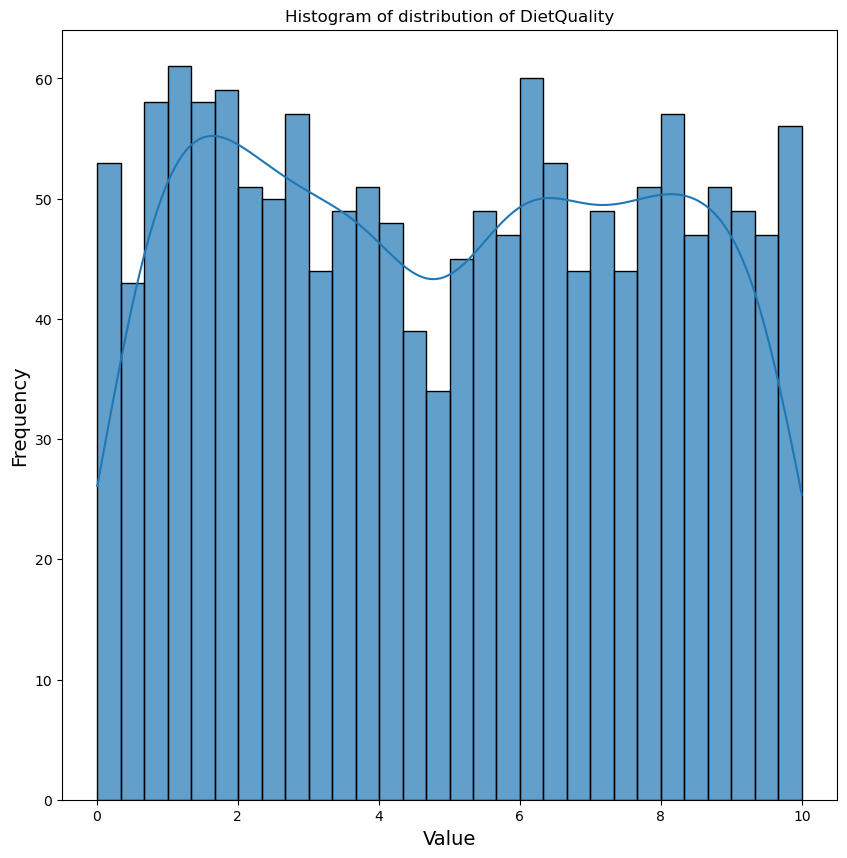

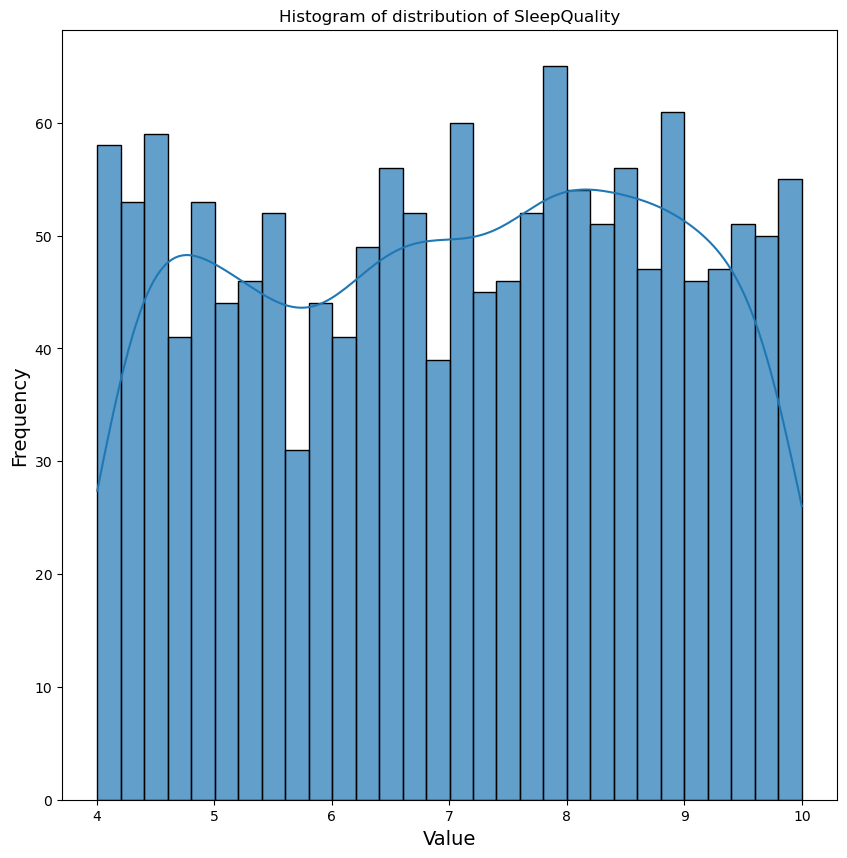

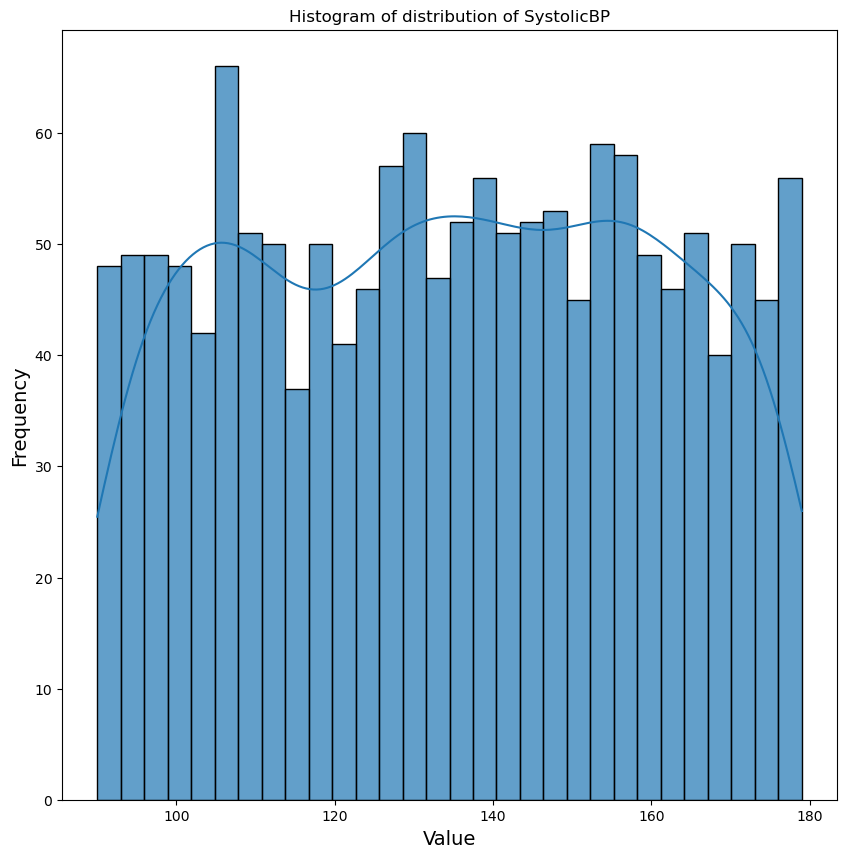

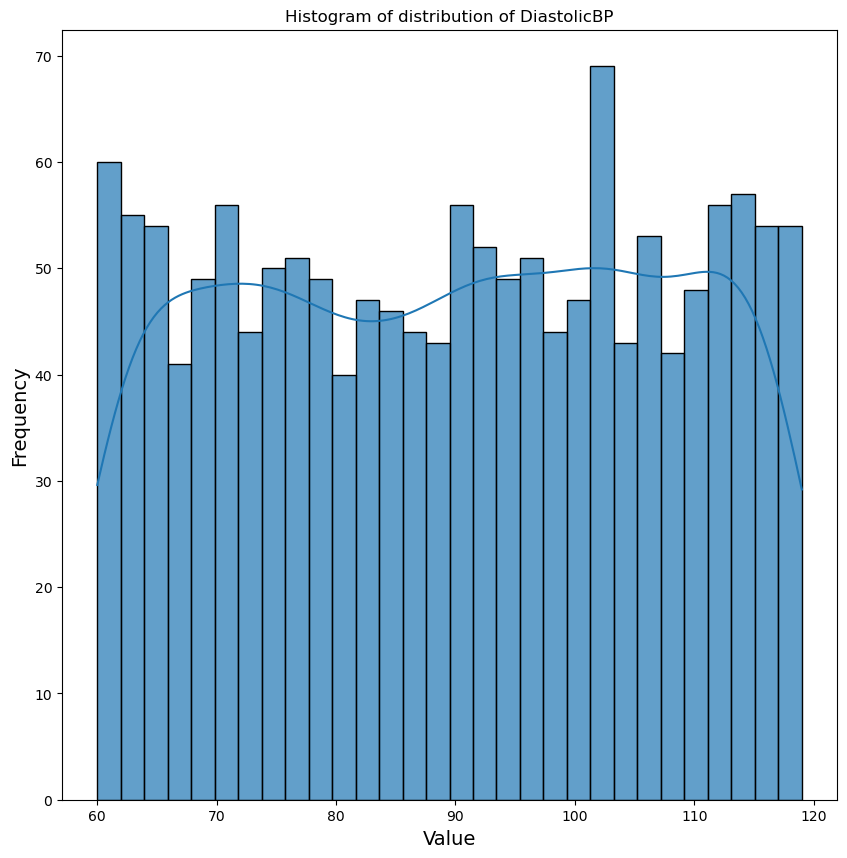

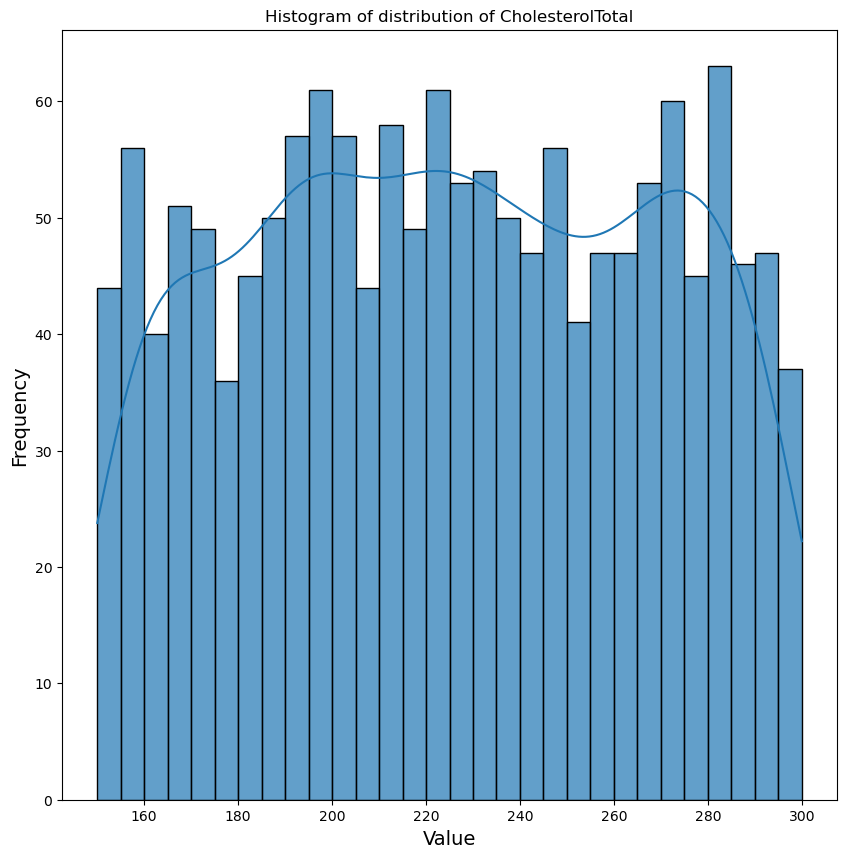

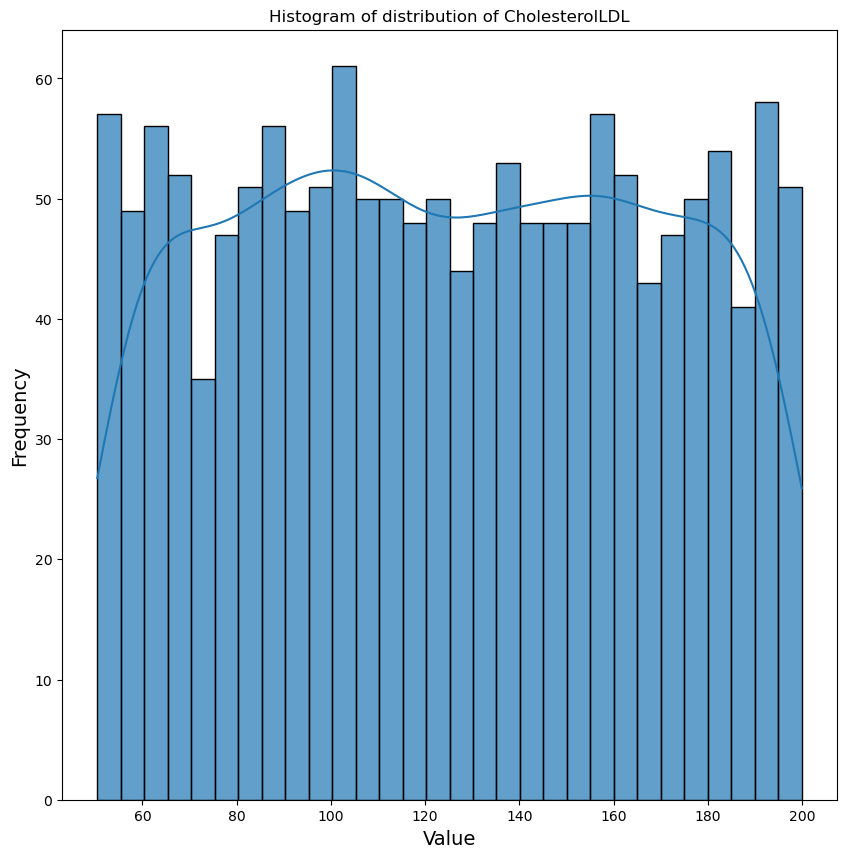

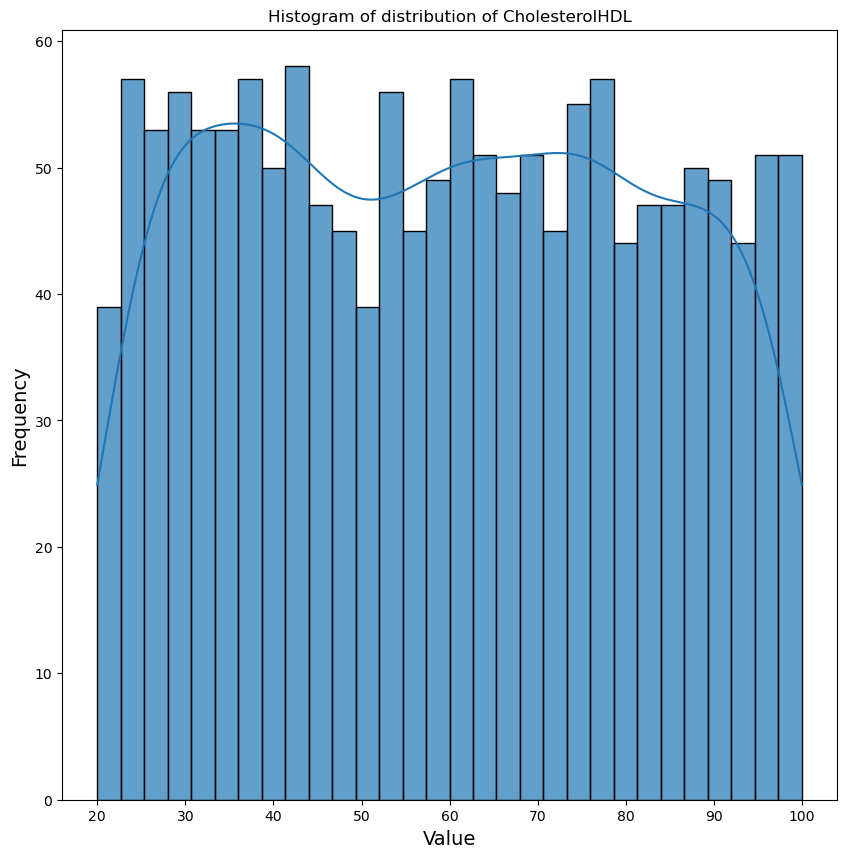

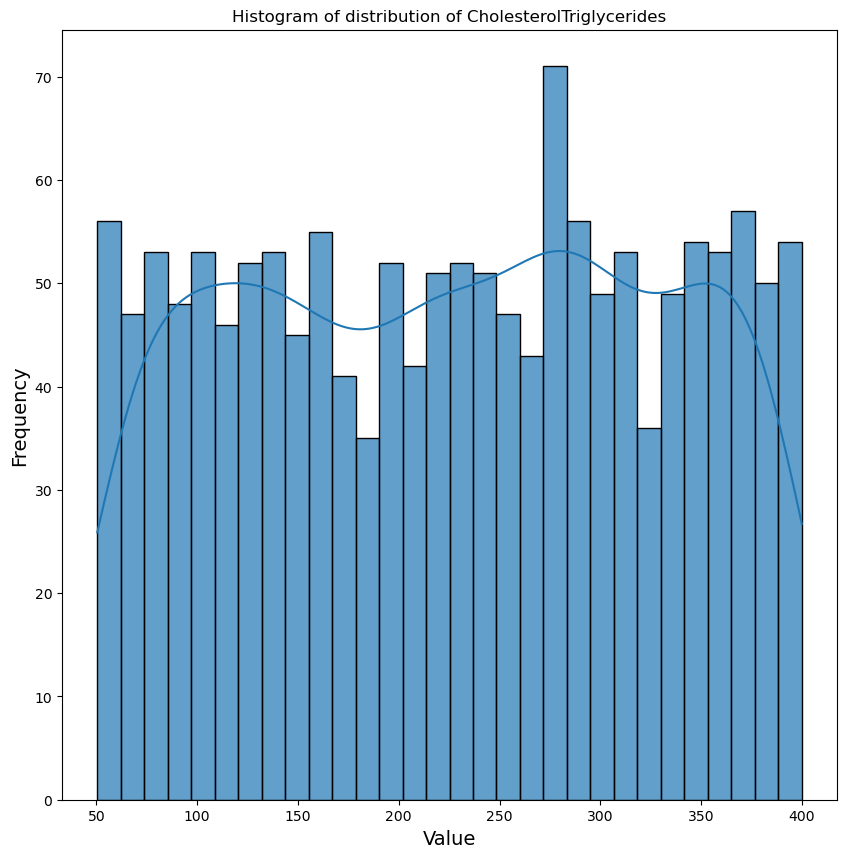

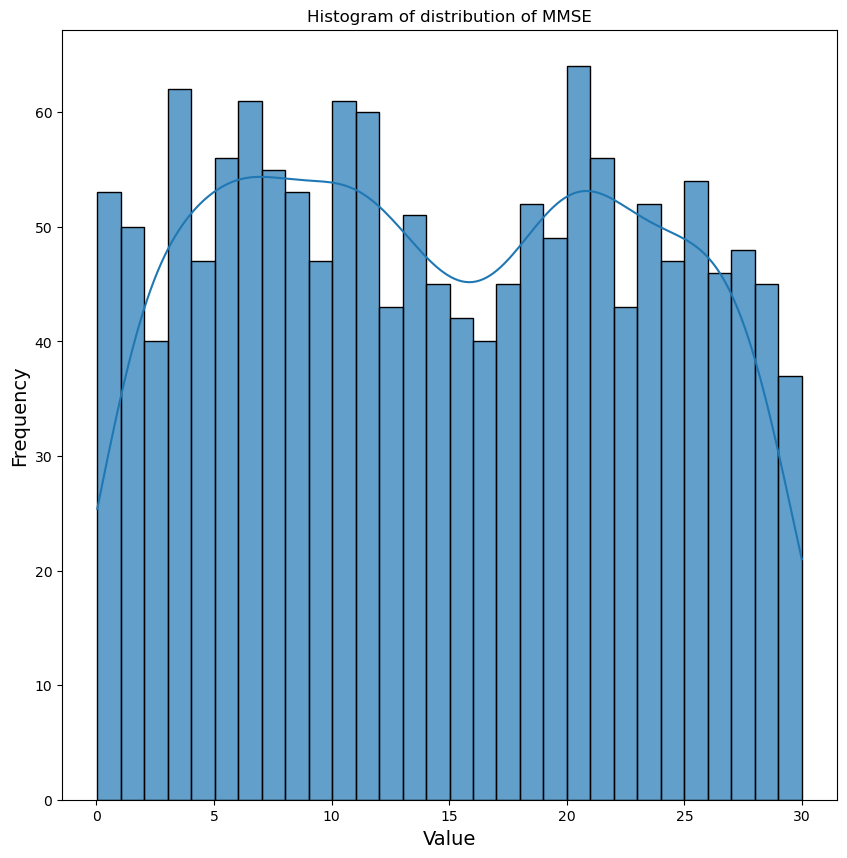

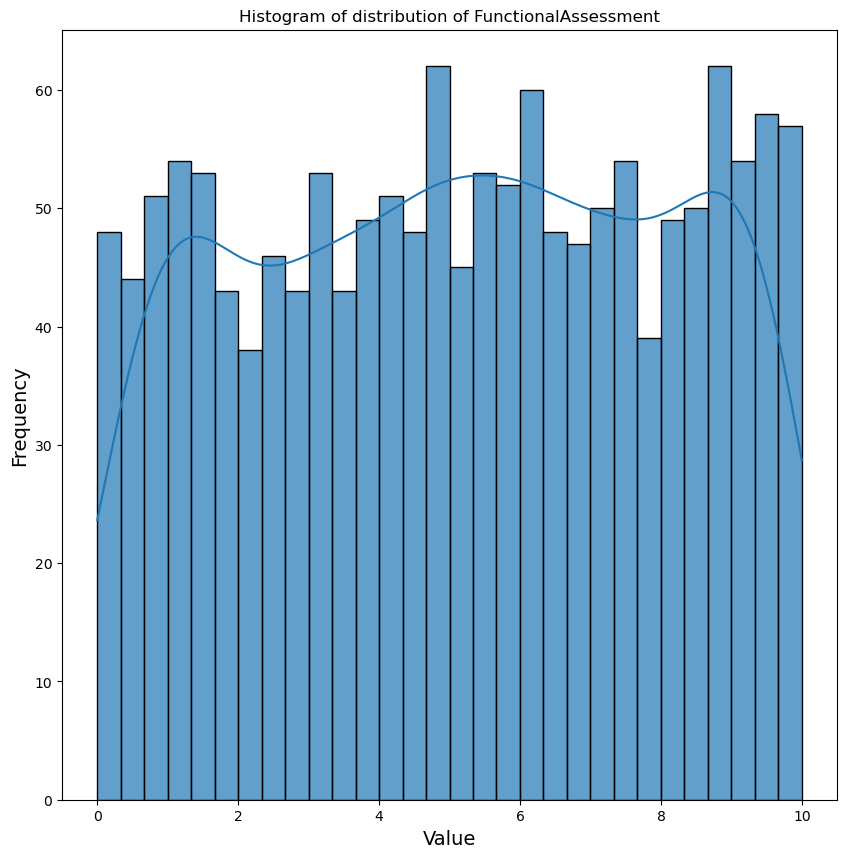

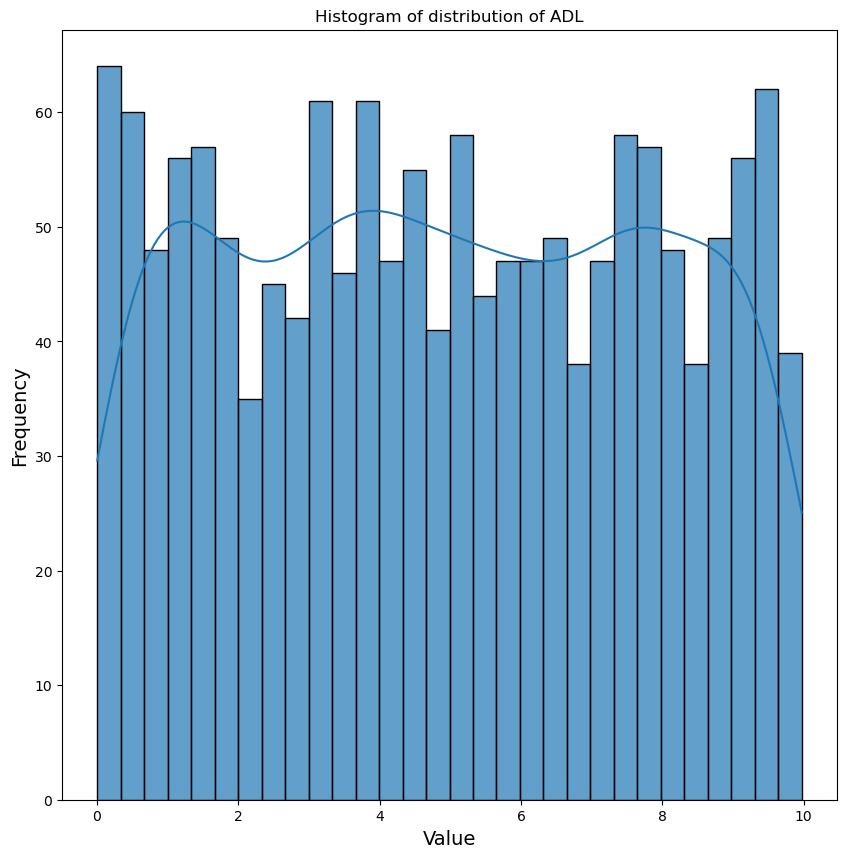

In [148]:
for col_3 in numerical_columns:
    plt.figure(figsize=(10,10))
    sns.histplot(df_train[col_3], bins=30, kde=True, edgecolor='black', alpha=0.7) 
    plt.title(f'Histogram of distribution of {col_3}')
    plt.xlabel('Value', fontsize = 14)
    plt.ylabel('Frequency', fontsize = 14)
    plt.show()

In [149]:
categorical_columns = []
for col in df_train.columns:
    if df_train[col].nunique() <= 4:
        categorical_columns.append(col)
print(f"Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


Variables explanations:
1. Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
2. Ethnicity: The ethnicity of the patients, coded as follows:
   0: Caucasian
   1: African American
   2: Asian
   3: Other
3. EducationLevel: The education level of the patients, coded as follows:
   0: None
   1: High School
   2: Bachelor's
   3: Higher
4. Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
5. FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
6. CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
7. Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
8. Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
9. HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.
10. Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
11. MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
12. BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
13. Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.
14. Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
15. PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
16. DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
17. Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.
18. Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

In the machine learning models, the variable 'Diagnosis' is our target for prediction (dependent variable). 

In [150]:
print(len(categorical_columns))

18


In [151]:
alternative_one = categorical_columns[:17]
print(alternative_one)

['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


For the set of categorical variables above, we remove the 'Diagnosis' since this is our target. 

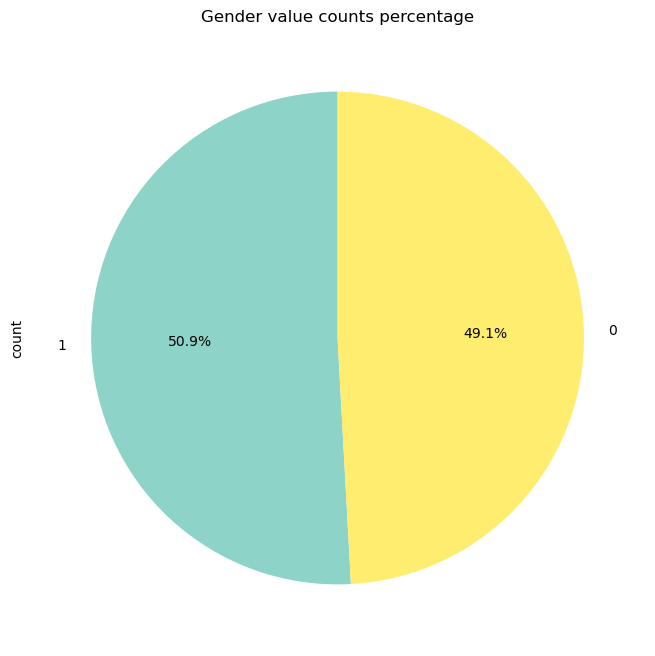

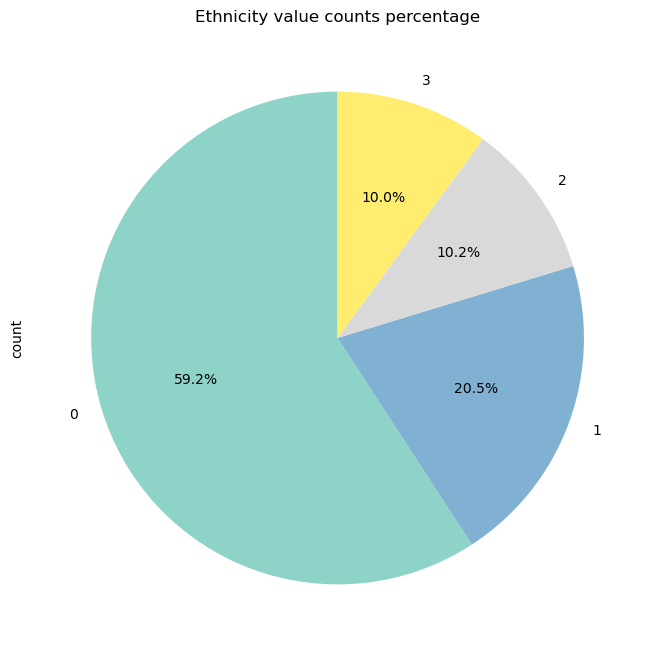

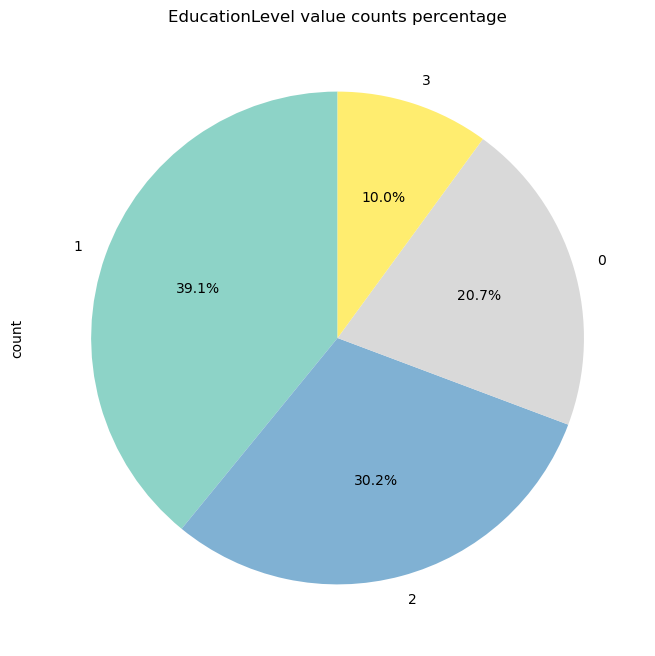

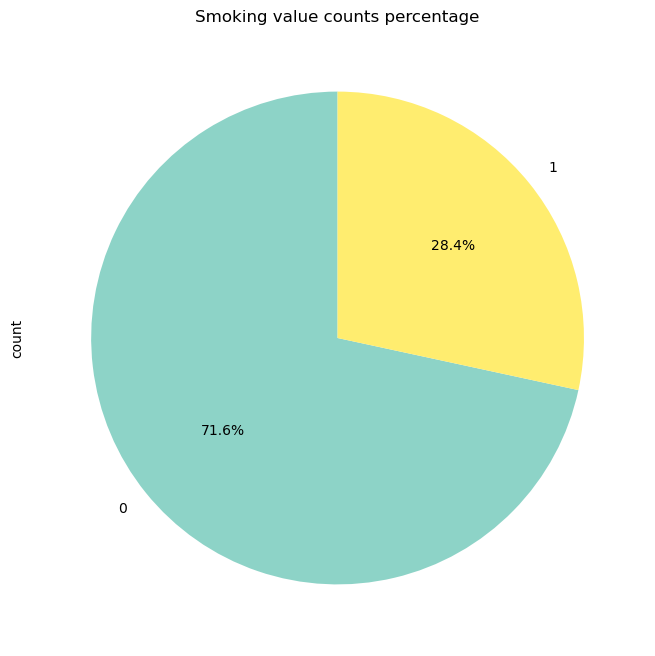

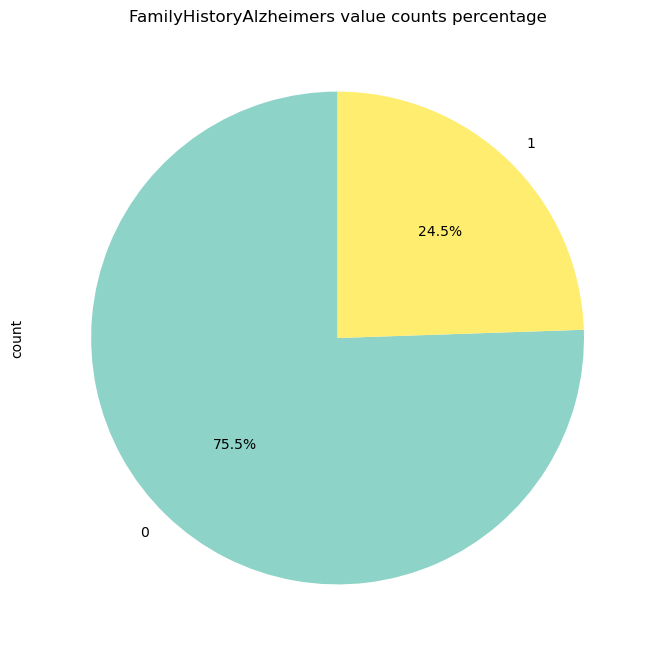

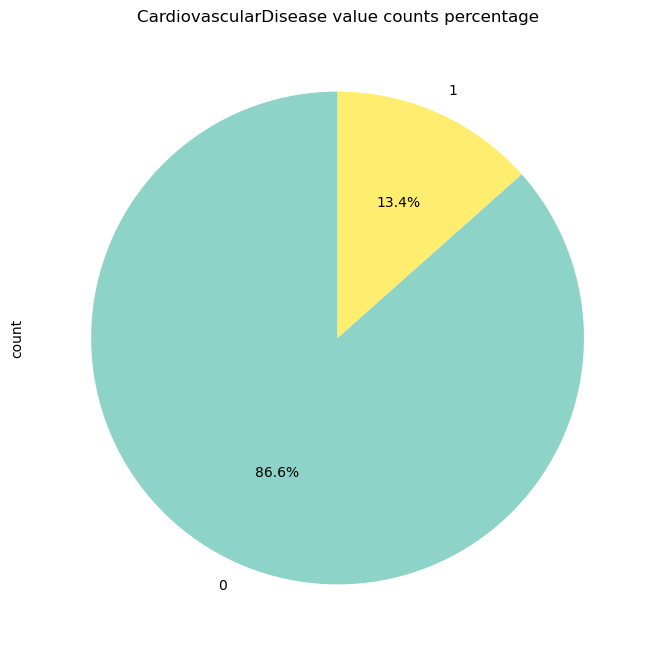

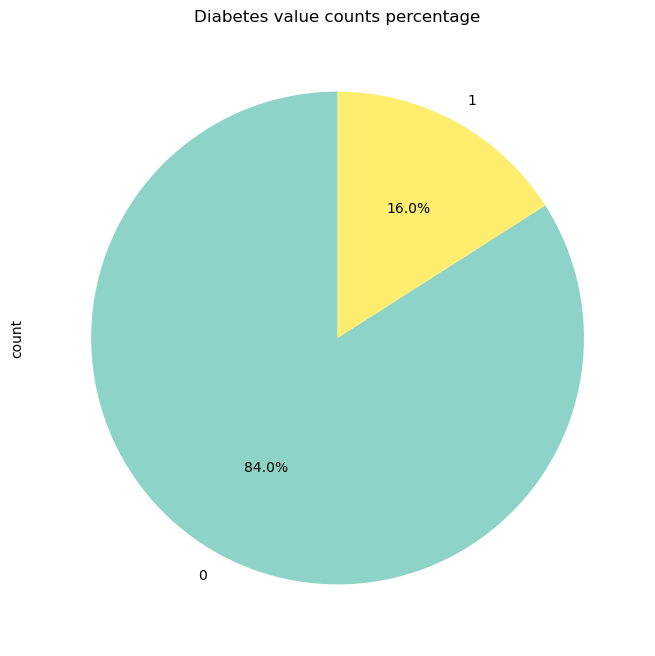

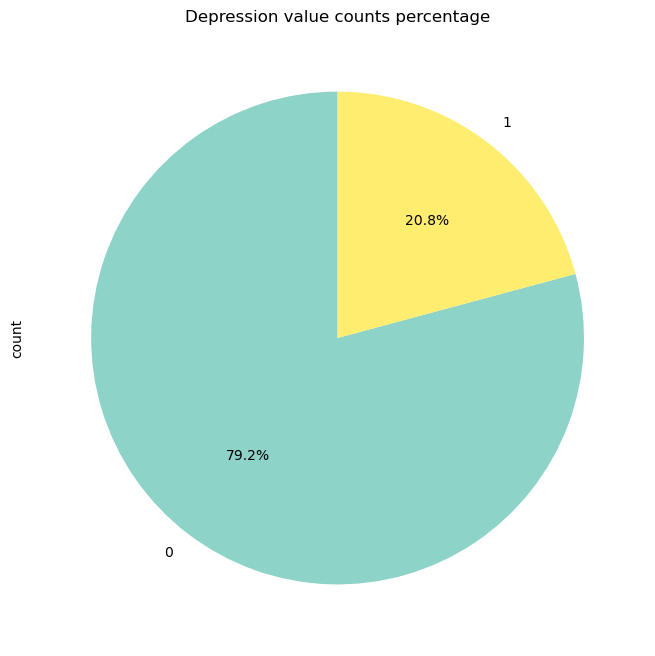

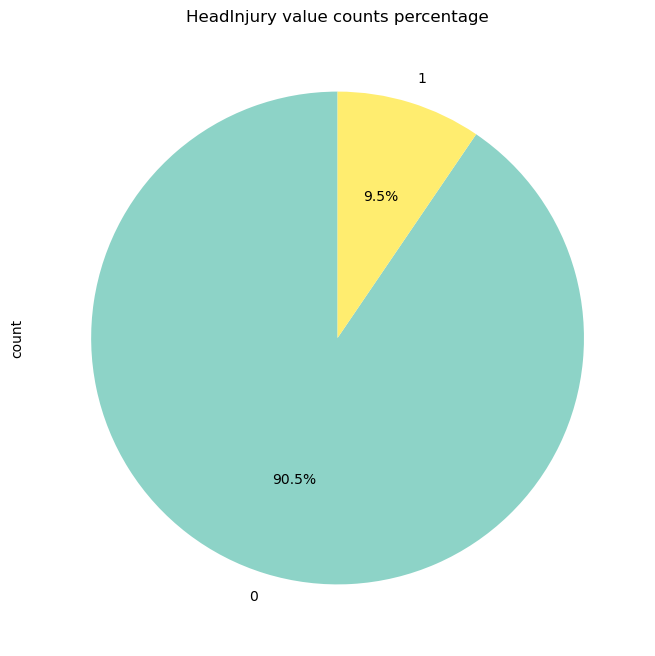

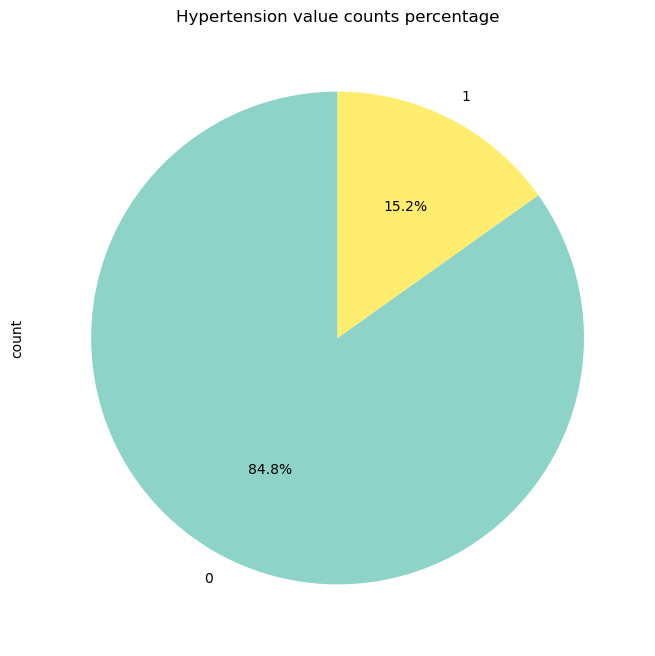

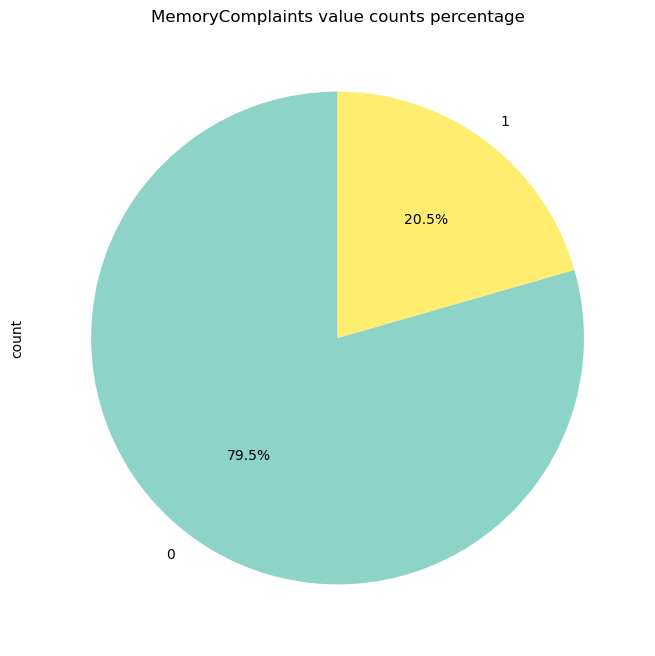

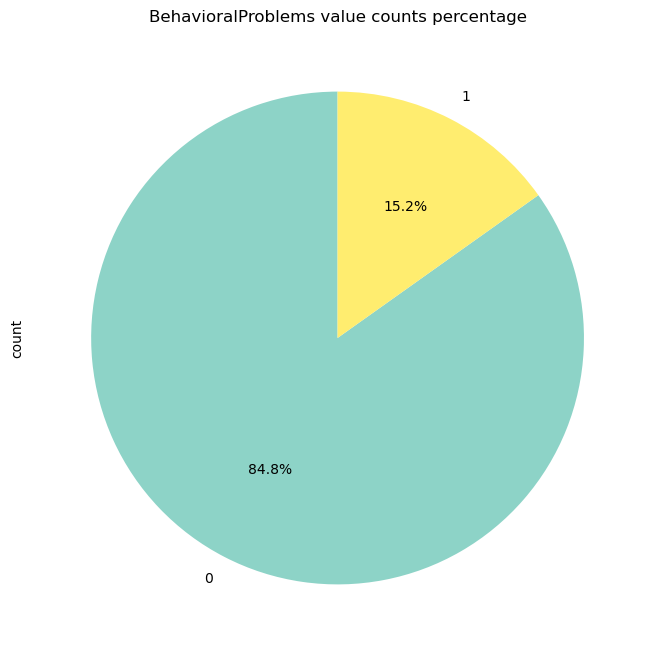

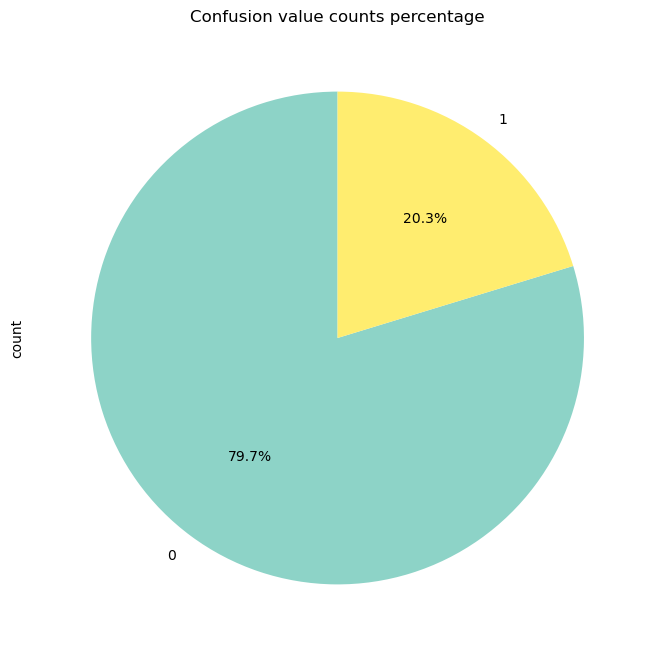

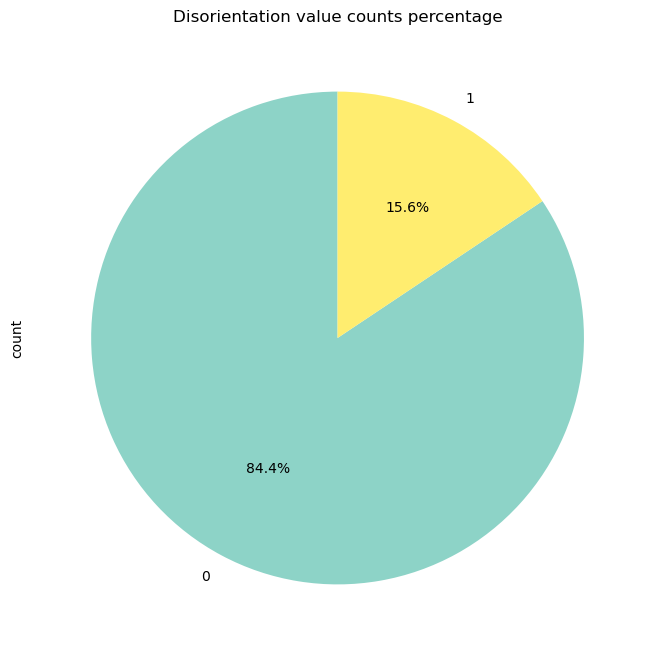

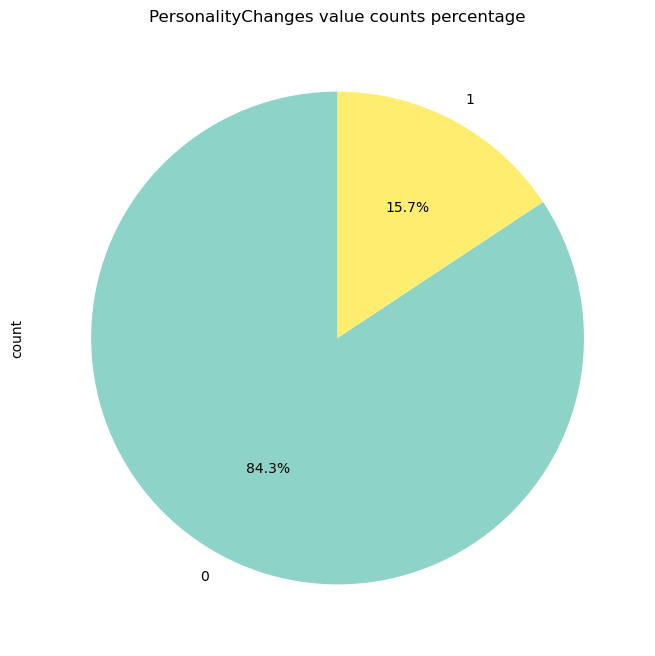

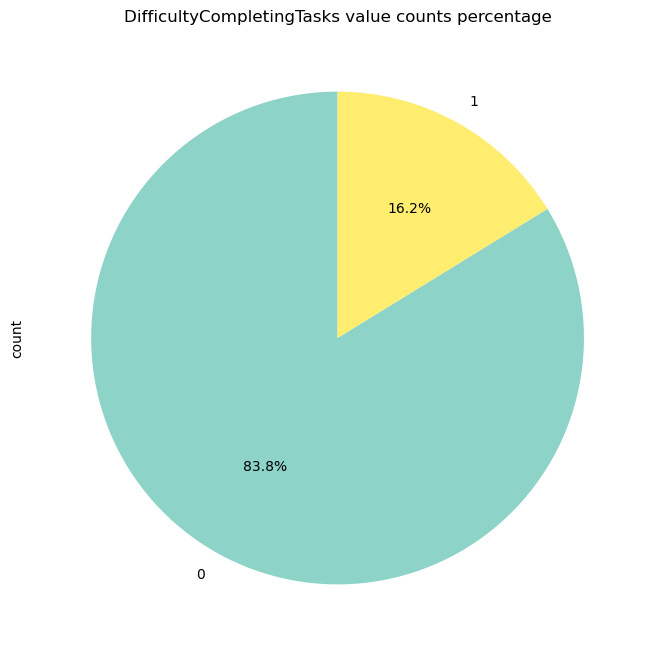

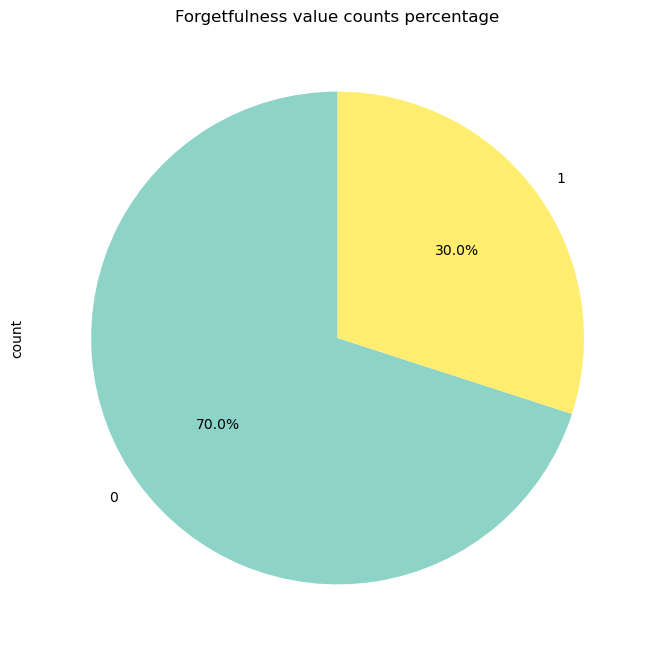

In [153]:
for col_2 in alternative_one:
    value_counts = df_train[col_2].value_counts()
    plt.figure(figsize = (8,8))
    value_counts.plot.pie(autopct = '%1.1f%%', startangle=90, colormap= 'Set3')
    plt.title(f'{col_2} value counts percentage')
    plt.show()

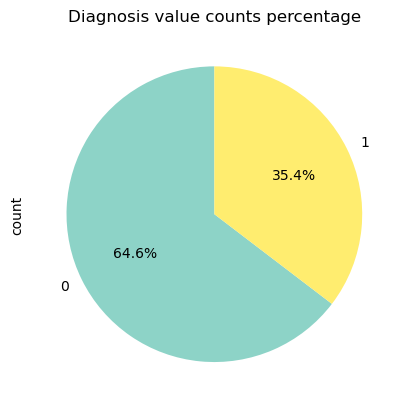

In [182]:
value_counts = df_train['Diagnosis'].value_counts()
value_counts.plot.pie(autopct = '%1.1f%%', startangle=90, colormap= 'Set3')
plt.title('Diagnosis value counts percentage')
plt.savefig('Diagnosis value counts distribution.png')
plt.show()

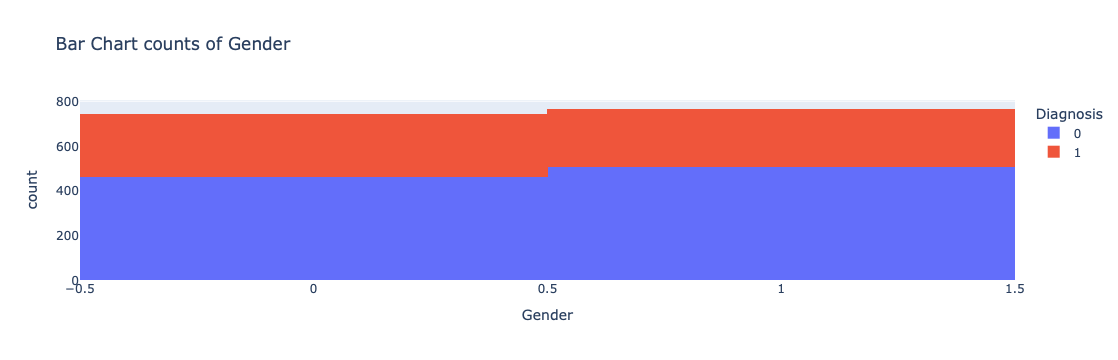

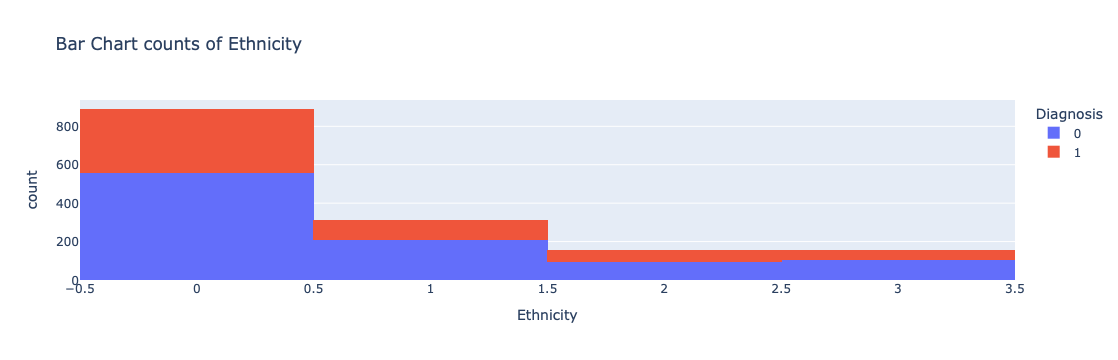

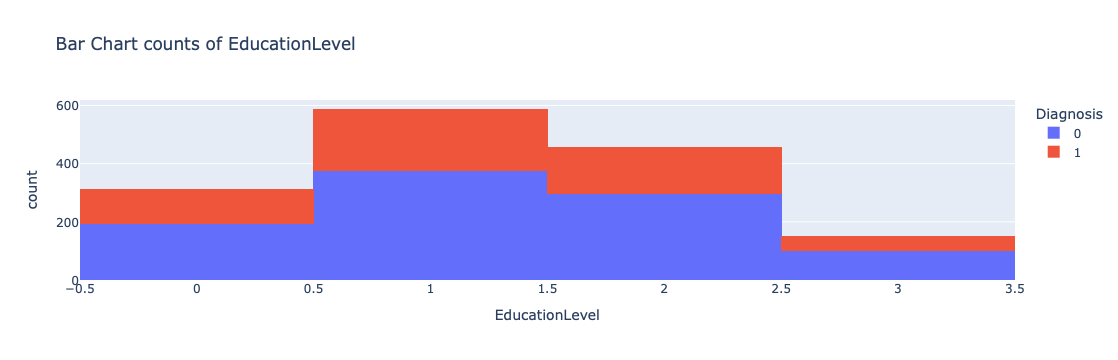

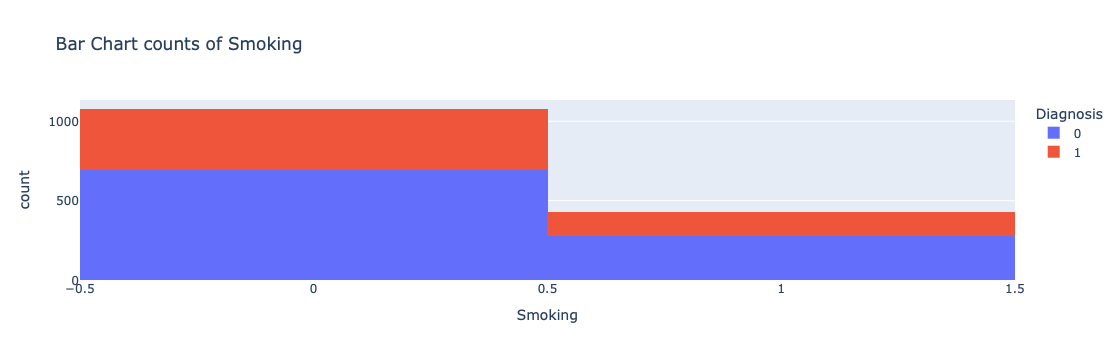

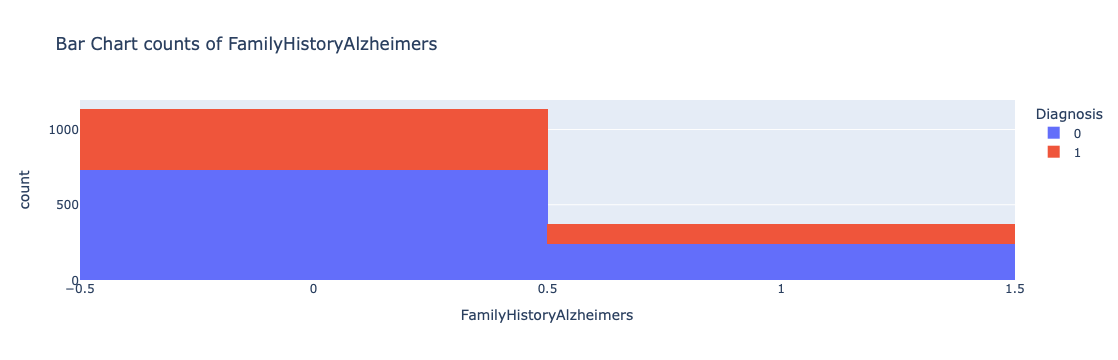

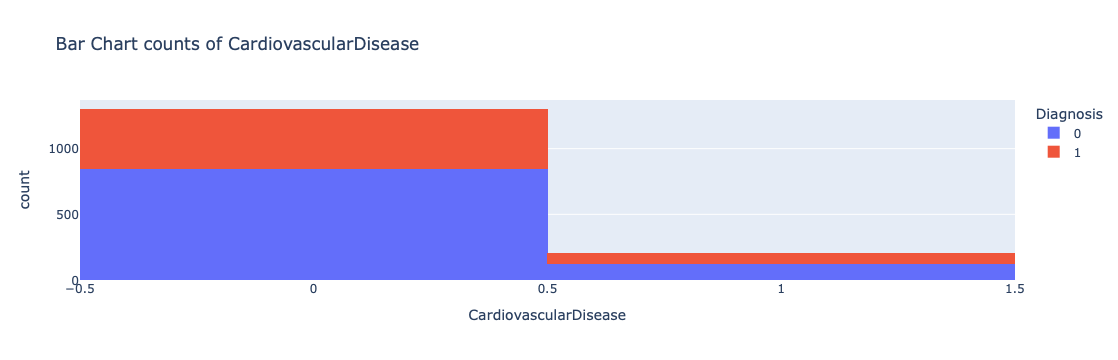

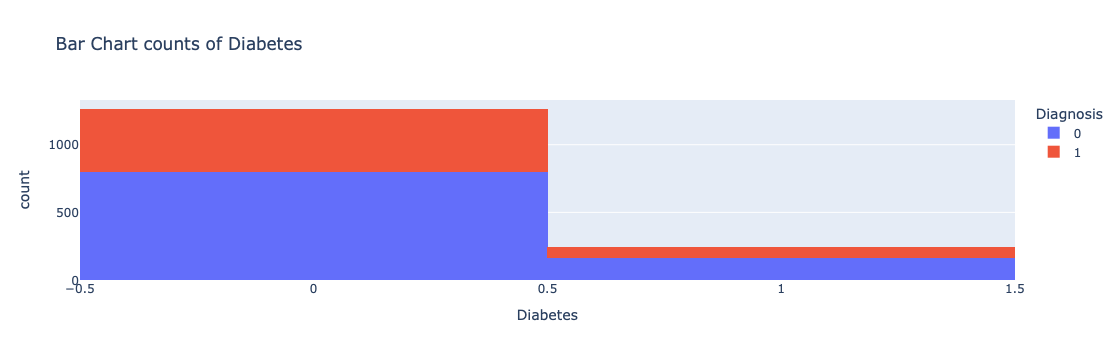

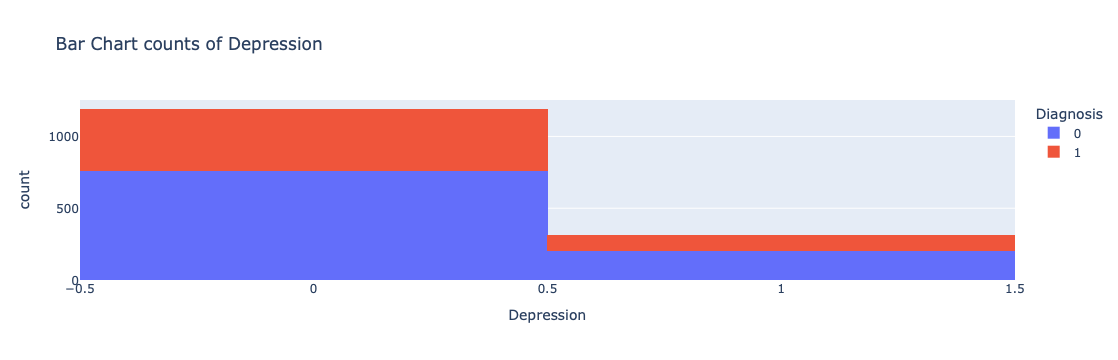

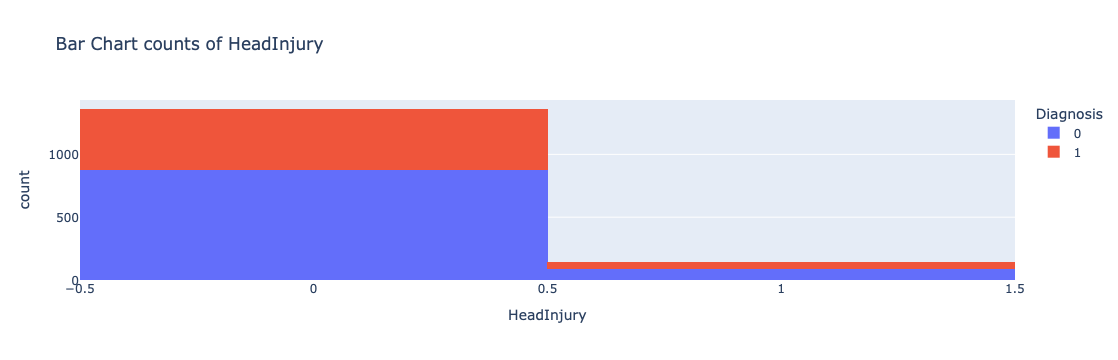

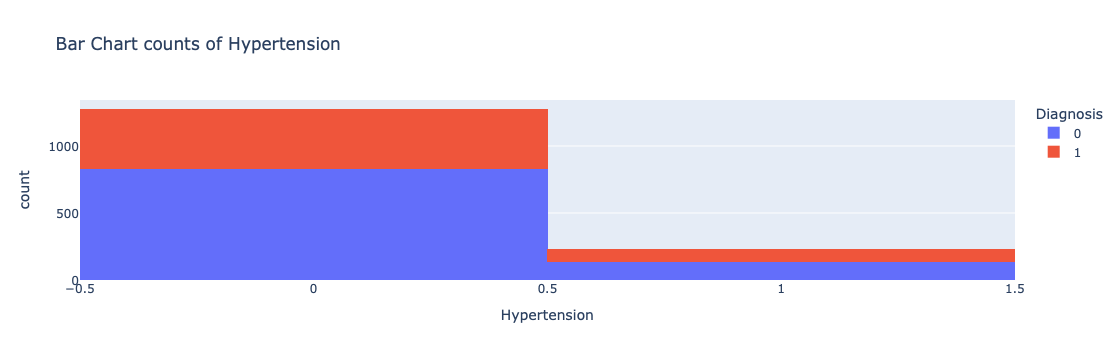

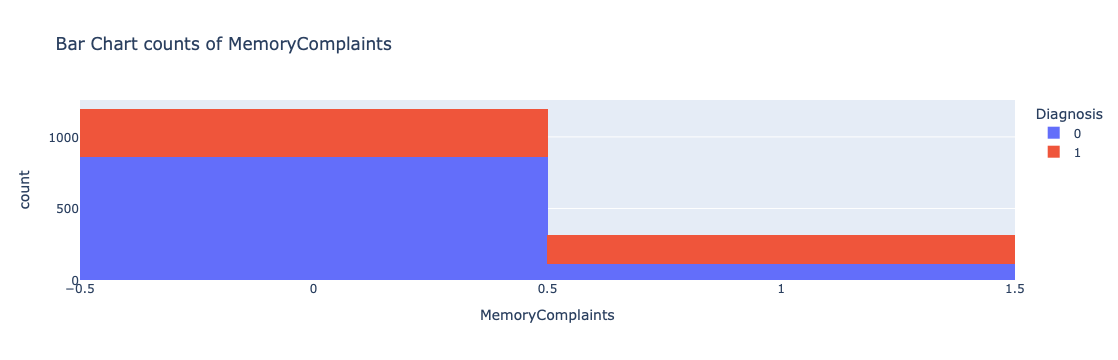

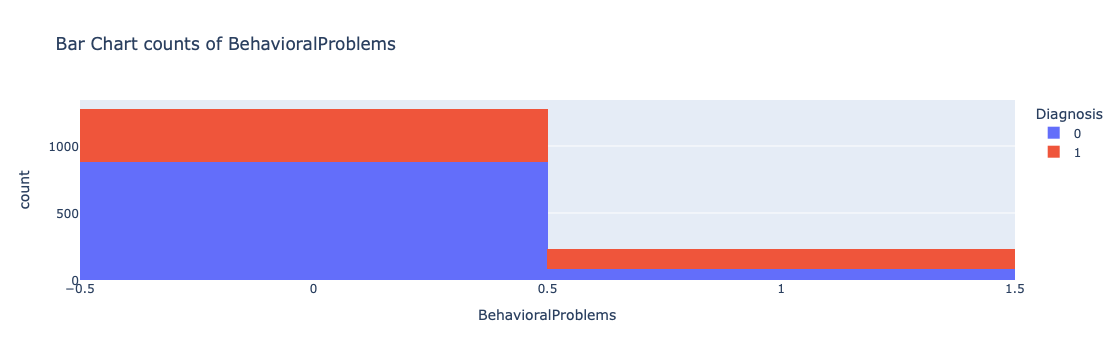

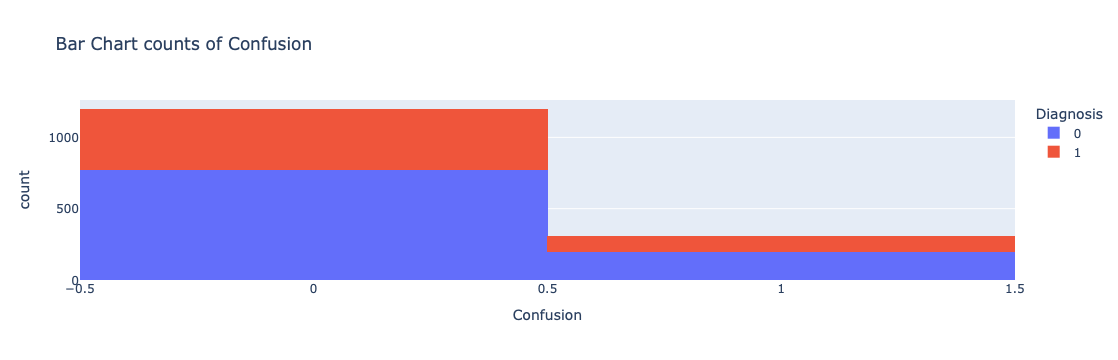

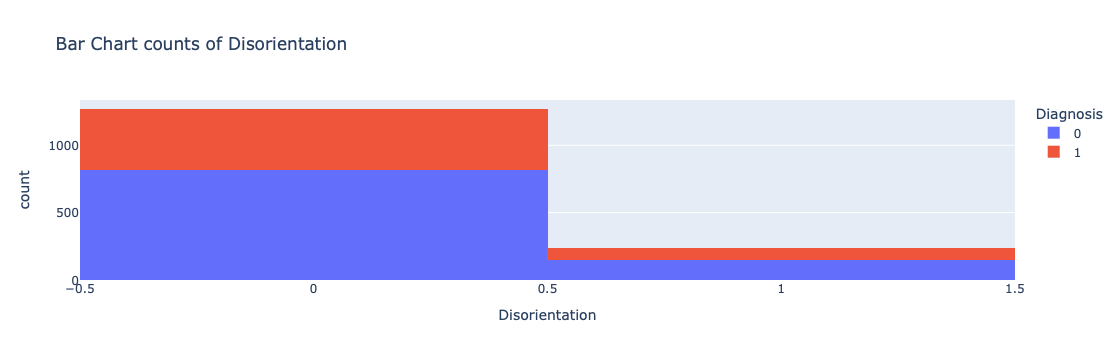

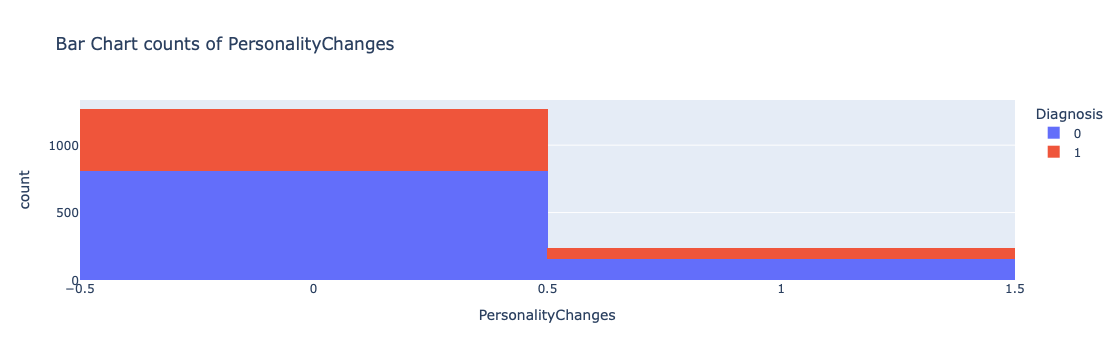

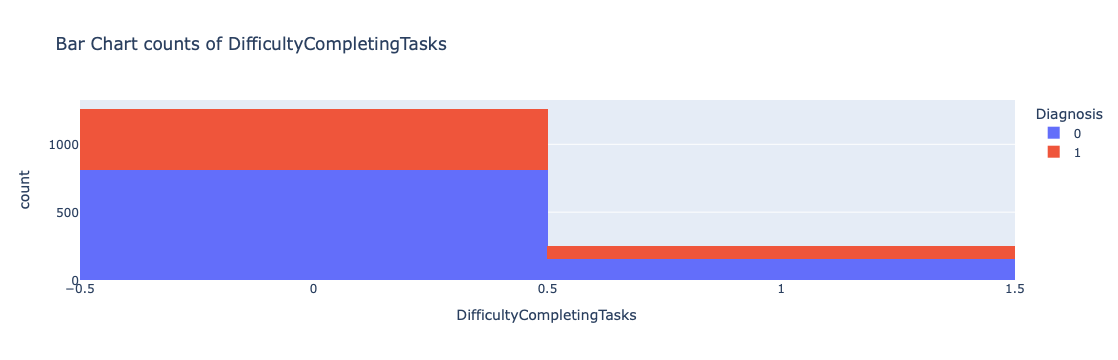

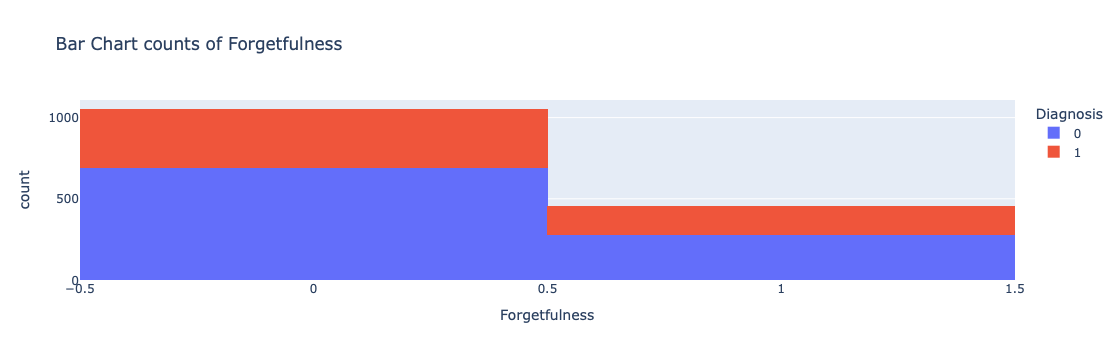

In [154]:
for col_5 in alternative_one:
    fig = px.histogram(df_train, x=col_5, color = 'Diagnosis', title=f"Bar Chart counts of {col_5}")
    fig.show()

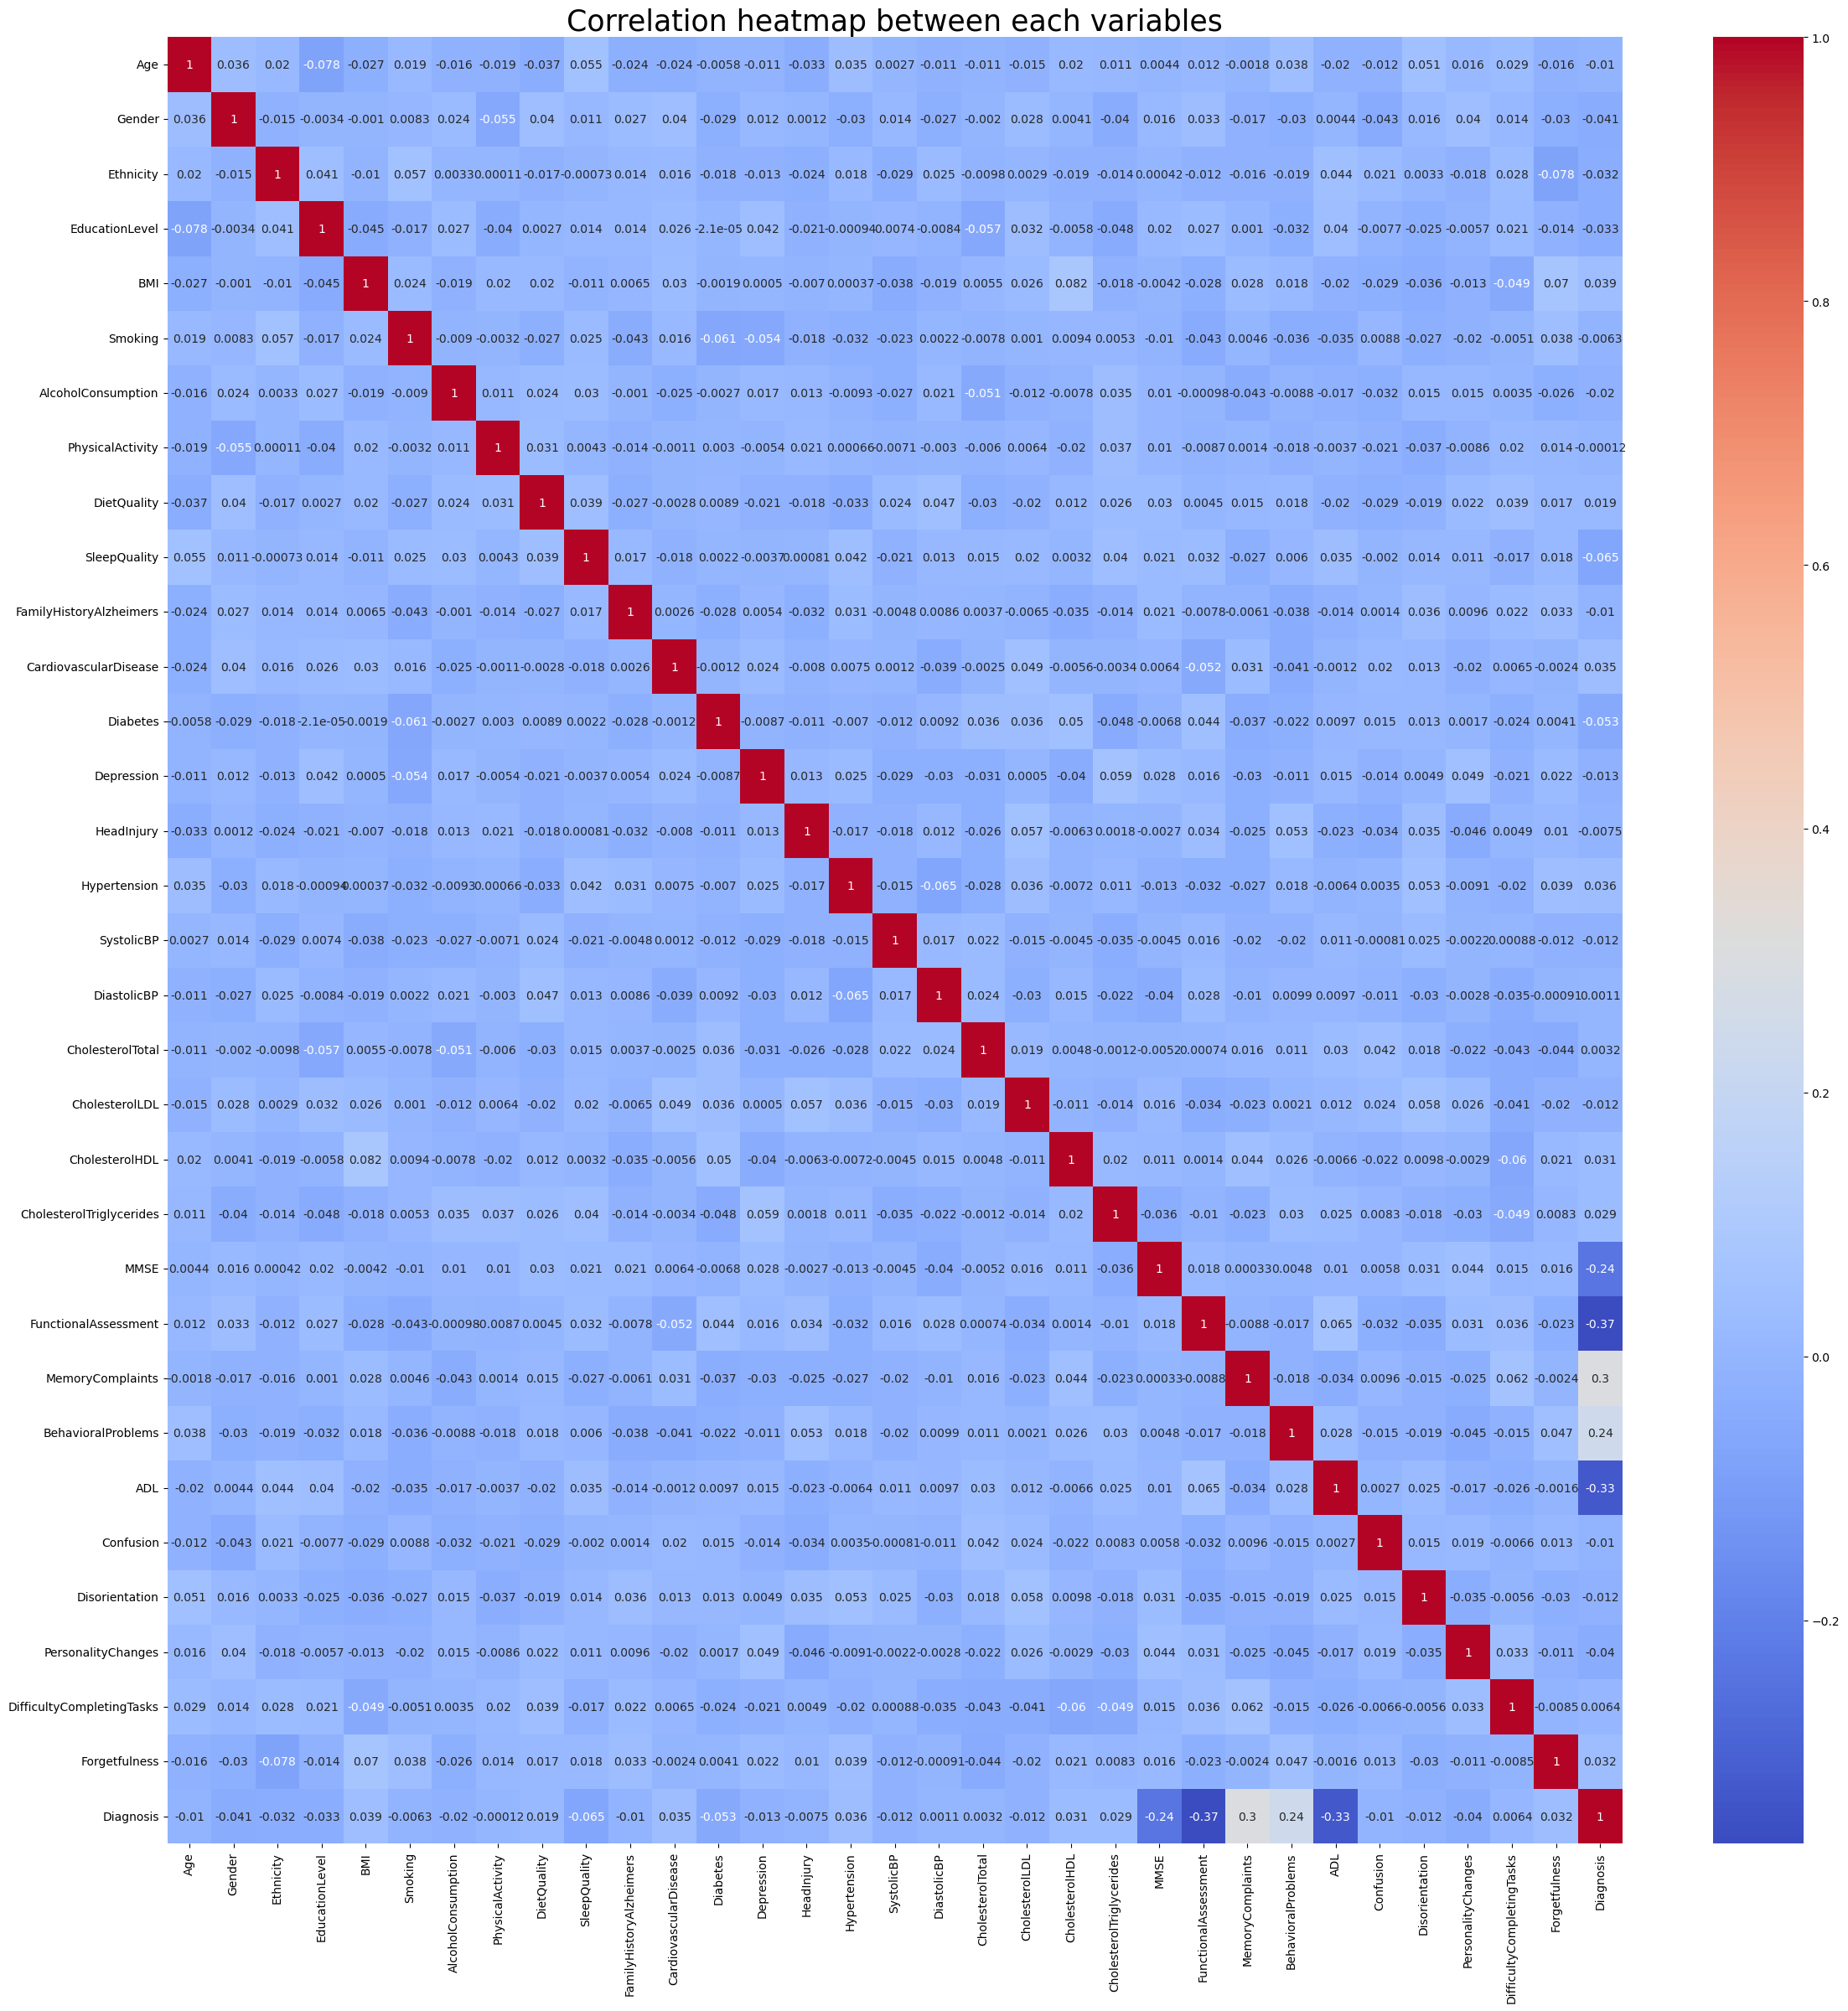

In [155]:
plt.figure(figsize = (28,28))
sns.heatmap(df_train.corr(),cmap="coolwarm", annot = True)
plt.title('Correlation heatmap between each variables', size = 25)
plt.show()